# <h1><center><font color='black'>Pokemon's Stats Analysis</font> </center></h1>

*Sergio Chavez Lazo*

*June-July 2021*

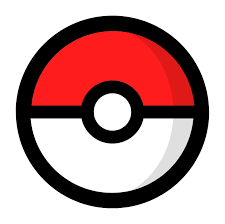
    
**This is my first project on my path to become a data analyst** and I cannot imagine a better way to start it than using a dataset that reminds me one of my favorite series of all time: Pokemon. 

I will answer 9 questions that I have always have about pokemons by using my basic coding skills. The questions are:

1. Which is the generation with more legendaries?
2. Which is the generation with more megas?
3. If we choose the best pokemon for each feature (Attack, Defense, etc,) how would the team look like?
3. If we choose the best legendary pokemon for each feature (Attack, Defense, etc,) how would the team look like?
4. What could be a good way to categorize non-legendary nor megas pokemons based on their Total Stats? 
4. If we choose the best pokemons for each feature in every type of pokemon, how would the team look like for each type? Which team would be the more balanced?
6. Is there any correlation between features? Is this correlation more or less strong among each generation?
7. Is there any asociation between been legendary and first type of pokemon? (Chi square)
8. Can we predict if one pokemon is legendary or not based on his total? (Logistic Regression)

I will use the dataset provided by Keith Galli in one of the most [helpful tutorial](https://www.youtube.com/watch?v=vmEHCJofslg&t=1226s) I have ever seen to use Pandas



## Getting and cleaning the data

###  A. Getting the data from github

To get the data and start cleaning it, we need our first library [pandas](https://pandas.pydata.org/). We notice that the dataset is in a csv file, so we import it with the function read_csv. Since now, the df object would be the original dataset

In [1]:
import pandas as pd

url='https://raw.githubusercontent.com/sergiochavezlazo/pandas/master/pokemon_data.csv'
df=pd.read_csv(url)
df

#                   Name   Type 1  Type 2  HP  Attack  Defense  \
0      1              Bulbasaur    Grass  Poison  45      49       49   
1      2                Ivysaur    Grass  Poison  60      62       63   
2      3               Venusaur    Grass  Poison  80      82       83   
3      3  VenusaurMega Venusaur    Grass  Poison  80     100      123   
4      4             Charmander     Fire     NaN  39      52       43   
..   ...                    ...      ...     ...  ..     ...      ...   
795  719                Diancie     Rock   Fairy  50     100      150   
796  719    DiancieMega Diancie     Rock   Fairy  50     160      110   
797  720    HoopaHoopa Confined  Psychic   Ghost  80     110       60   
798  720     HoopaHoopa Unbound  Psychic    Dark  80     160       60   
799  721              Volcanion     Fire   Water  80     110      120   

     Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0         65       65     45           1      False  
1         80       80     60           1      False  
2        100      100     80           1      False  
3        122      120     80           1      False  
4         60       50     65           1      False  
..       ...      ...    ...         ...        ...  
795      100      150     50           6       True  
796      160      110    110           6       True  
797      150      130     70           6       True  
798      170      130     80           6       True  
799      130       90     70           6       True  

[800 rows x 12 columns]

### B. First changes

By checking the dataset, there are four major changes we want to apply before we start the analysis. 

- Replace the NaN values in the column "Type 2"
- Calculate a new column "Total Stats" that sum all the feature of every pokemon
- Give a name to each generation 
- Create a new column that woul help us to know the numer of pokemons.

**Replace the NaN values in the column "Type 2"**

In [2]:
df.fillna(0, inplace=True)

**Calculate a new column "Total Stats" that sum all the feature of every pokemon**

In [3]:
df["Total"]=df.iloc[:,4:10].sum(axis=1)

**Give a name to each generation** *(Be aware that = mean assing, and == means equal)*

In [4]:
generation=["Kanto","Jhoto","Hoenn","Sinnoh","Teselia","Kalos"]
df["Labeled generation"]=1

for i in range (6):
    df.loc[df["Generation"]==i+1, "Labeled generation"]=generation[0+i]
    i=+1

**Create a new column that would help us to know the number of pokemons.**

In [5]:
df["N° of pokemon"]=1

**Check if some values are correct. For instance, check if Mew is labeled as legendary**

In [6]:
#Check which is the state of Mew

df.loc[df["Name"]=="Mew"]
    
#We know have the index value of Mew in the ROWS (165)

df.columns.get_loc("Legendary")

#We now also know the index of the COLUMN (11)

df.iloc[165,11]=True

#Then, we just have to check it

df.loc[df["Name"]=="Mew"]


# Name   Type 1 Type 2   HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  \
165  151  Mew  Psychic      0  100     100      100      100      100    100   

     Generation  Legendary  Total Labeled generation  N° of pokemon  
165           1       True    600              Kanto              1

**Now lets just take note of some basic coding for exploration**

In [7]:
#Search the columns of your dataset
df.columns
#Find the possible values in one column (for this command, the () makes the difference)
df["Type 1"].unique()
#Check the datatypes in the dataset
df.dtypes

#                      int64
Name                  object
Type 1                object
Type 2                object
HP                     int64
Attack                 int64
Defense                int64
Sp. Atk                int64
Sp. Def                int64
Speed                  int64
Generation             int64
Legendary               bool
Total                  int64
Labeled generation    object
N° of pokemon          int64
dtype: object

### C. Creating subsets

Now, we want to create 4 subsets, one that excludes legendaries, and one that excludes legendaries and megas, one that just contains legendaries and one that just contains megas

In [8]:
#Dataset without legendaries

df_nl=df.loc[df["Legendary"]==False]

In [9]:
#Dataset without legendaries and megas

df_nop=df.loc[(~df["Name"].str.contains("Mega"))&(df["Legendary"]==False)]

In [10]:
#Dataset of just legendaries (no mega legendaries)

df_leg=df.loc[df["Legendary"]==True]

df_leg=df_leg.loc[~df_leg["Name"].str.contains("Mega")]


In [11]:
#Dataset with just Megas
df_megas=df.loc[df["Name"].str.contains("Mega")]

## Question 1. Which is the generation with more legendaries?

To answer this question we will have to apply the function groupby and agg (this command is very helpful, flexible and precise)

In [12]:
df_leg.groupby(["Labeled generation","Generation"]).agg({"N° of pokemon":"count"}).sort_values("Generation",ascending=True)

N° of pokemon
Labeled generation Generation               
Kanto              1                       5
Jhoto              2                       5
Hoenn              3                      15
Sinnoh             4                      13
Teselia            5                      15
Kalos              6                       7

Now lets plot the results. To do this, we will need new libraries: matplotlib and seaborn

In [13]:
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
plot1=df_leg.groupby(["Labeled generation","Generation"]).agg({"N° of pokemon":"count"}).sort_values("Generation",ascending=True)

plot1=pd.DataFrame(plot1)

plot1.reset_index(inplace=True)

plot1.columns

Index(['Labeled generation', 'Generation', 'N° of pokemon'], dtype='object')

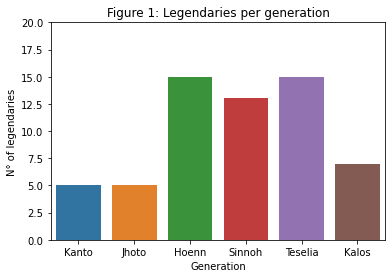

In [15]:
ax1=sns.barplot(data=plot1, x="Labeled generation", y="N° of pokemon")

ax1.set(title="Figure 1: Legendaries per generation",ylabel="N° of legendaries",xlabel="Generation",ylim=(0, 20))
plt.show()

## Question 2. Which is the generation with more megas?

To answe this question we will have to use the groupby command and agg. 

In [16]:
plot2 = df_megas.groupby(["Labeled generation","Generation"]).agg({"N° of pokemon":"count"}).sort_values("Generation",ascending=True)

plot2=pd.DataFrame(plot2)

plot2.reset_index(inplace=True)

plot2

Labeled generation  Generation  N° of pokemon
0              Kanto           1             15
1              Jhoto           2              7
2              Hoenn           3             20
3             Sinnoh           4              5
4            Teselia           5              1
5              Kalos           6              1

Now lets plot the results

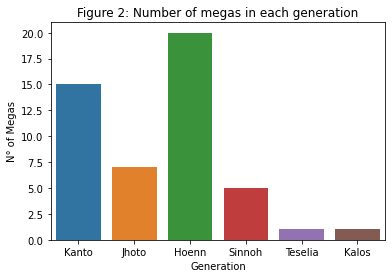

In [17]:
ax2=sns.barplot(data=plot2, x="Labeled generation",y="N° of pokemon")

ax2.set(title="Figure 2: Number of megas in each generation",ylabel="N° of Megas", xlabel="Generation")
plt.show()

**Interpretation of Q1 and Q2**: *The results of question 1 and 2 show that Hoenn is the generation with more legendaries and more Megas until this moment. This could be the reason why this region is considered the best generation among the pokemon fans community.*

## QUESTION 3. If we choose the best pokemon for each feature (Attack, Defense, etc,) how would the team look like?

In [18]:
df_b1=df_nop.sort_values("Speed",ascending=False).head(1)
df_b1

best_pokemons=[]

In [19]:
features=["HP", "Attack","Defense","Sp. Atk","Sp. Def","Speed"]

for e in range(6):
        a="df_n"
        b=str(features[e])
        globals()[a+b]=df_nop.sort_values(features[e],ascending=False).head(1)
        best_pokemons.append(globals()[a+b])
        e=+1
    
#Be careful of not running this cell more than one time because you will still appending more objects to the list best_pokemons

In [20]:
#Now we give the dataframe the format of pandas

import numpy as np

best_pokemons=pd.DataFrame(np.row_stack(best_pokemons))

namescolumns=df.columns

best_pokemons.columns=namescolumns

best_pokemons

#                  Name  Type 1  Type 2   HP Attack Defense Sp. Atk  \
0  242               Blissey  Normal       0  255     10      10      75   
1  409             Rampardos    Rock       0   97    165      60      65   
2  213               Shuckle     Bug    Rock   20     10     230      10   
3  681  AegislashBlade Forme   Steel   Ghost   60    150      50     150   
4  213               Shuckle     Bug    Rock   20     10     230      10   
5  291               Ninjask     Bug  Flying   61     90      45      50   

  Sp. Def Speed Generation Legendary Total Labeled generation N° of pokemon  
0     135    55          2     False   540              Jhoto             1  
1      50    58          4     False   495             Sinnoh             1  
2     230     5          2     False   505              Jhoto             1  
3      50    60          6     False   520              Kalos             1  
4     230     5          2     False   505              Jhoto             1  
5      50   160          3     False   456              Hoenn             1

*If we check the dataframe that we have just created, we will notice that Shucckle is the pokemon with the best defense and Sp. Defense. In order to not repeat the same pokemon twice, we will erase one row and append the next pokemon*

### Droping duplicate values based on one criteria (or column)
Be aware that it would drop the second row, so if you want to eliminate the first row, just change the order of the dataframe

In [21]:
best_pokemons.drop_duplicates(subset="Name",inplace=True)

In [22]:
df_florges=df_nop.sort_values("Sp. Def",ascending=False).head(2)

df_florges1=df_florges.iloc[1]

pd.DataFrame(df_florges1)

best_pokemons=best_pokemons.append(df_florges1)

best_pokemons

#                  Name  Type 1  Type 2   HP Attack Defense Sp. Atk  \
0    242               Blissey  Normal       0  255     10      10      75   
1    409             Rampardos    Rock       0   97    165      60      65   
2    213               Shuckle     Bug    Rock   20     10     230      10   
3    681  AegislashBlade Forme   Steel   Ghost   60    150      50     150   
5    291               Ninjask     Bug  Flying   61     90      45      50   
739  671               Florges   Fairy       0   78     65      68     112   

    Sp. Def Speed Generation Legendary Total Labeled generation N° of pokemon  
0       135    55          2     False   540              Jhoto             1  
1        50    58          4     False   495             Sinnoh             1  
2       230     5          2     False   505              Jhoto             1  
3        50    60          6     False   520              Kalos             1  
5        50   160          3     False   456              Hoenn             1  
739     154    75          6     False   552              Kalos             1

In [23]:
feature=["HP", "Attack","Defense","Sp. Atk","Speed","Sp. Defense"]

for e in range(6):
    print("Based on", feature[e],"the best non legendary pokemon is:", best_pokemons.iloc[e,1])

Based on HP the best non legendary pokemon is: Blissey
Based on Attack the best non legendary pokemon is: Rampardos
Based on Defense the best non legendary pokemon is: Shuckle
Based on Sp. Atk the best non legendary pokemon is: AegislashBlade Forme
Based on Speed the best non legendary pokemon is: Ninjask
Based on Sp. Defense the best non legendary pokemon is: Florges



HP | Attack| Defense| Sp.Attack| Speed| Sp. Defense
- | - | -| -| -| -
<img src="https://assets.pokemon.com/assets/cms2/img/pokedex/full/242.png" alt="Drawing" style="width: 500px;"/> | <img src="https://assets.pokemon.com/assets/cms2/img/pokedex/full/409.png" alt="Drawing" style="width: 500px;"/> |<img src="https://assets.pokemon.com/assets/cms2/img/pokedex/full/213.png" alt="Drawing" style="width: 500px;"/>|<img src="https://gamepress.gg/pokemonmasters/sites/pokemonmasters/files/styles/300h/public/2019-08/pm0746_12_sword3_256.ktx.png?itok=QaQSMD01" alt="Drawing" style="width: 500px;"/>|<img src="https://assets.pokemon.com/assets/cms2/img/pokedex/full/291.png" alt="Drawing" style="width: 500px;"/>|<img src="https://assets.pokemon.com/assets/cms2/img/pokedex/full/671.png" alt="Drawing" style="width: 500px;"/>

## QUESTION 4. If we choose the best legendary pokemon for each feature (Attack, Defense, etc,) how would the team look like?

This is the same question but applied for the dataset that only contains legendaries

In [24]:
speciality=["HP","Attack","Defense","Sp. Atk", "Sp. Def","Speed"]
best_legendary=[]

for i in range(6):
    ji=df_leg.sort_values(speciality[i],ascending=False).head(1)
    best_legendary.append(ji)

In [25]:
legendaries=pd.DataFrame(np.row_stack(best_legendary))

columns=df_leg.columns             
    
legendaries.columns=columns

In [26]:
for i in range(6):
    print("Based on",feature[i],"the best legendary is:",legendaries.iloc[i,1])

Based on HP the best legendary is: GiratinaAltered Forme
Based on Attack the best legendary is: DeoxysAttack Forme
Based on Defense the best legendary is: Regirock
Based on Sp. Atk the best legendary is: KyogrePrimal Kyogre
Based on Speed the best legendary is: Regice
Based on Sp. Defense the best legendary is: DeoxysSpeed Forme


HP|Attack|Defense|Sp. Attack|Sp. Defense|Speed
-|-|-|-|-|-
<img src="https://www.imore.com/sites/imore.com/files/styles/large/public/field/image/2019/12/pokemon-487-giratina-origin.png" alt="Drawing" style="width: 500px;"/> |<img src="https://assets.pokemon.com/assets/cms2/img/pokedex/full/386_f2.png" alt="Drawing" style="width: 500px;"/>|<img src="https://pokemon-project.com/espadaescudo/img/pokemon/377.png" alt="Drawing" style="width: 500px;"/>|<img src="https://2.bp.blogspot.com/-tZ5o7bFUOt0/WzAQQLv0KiI/AAAAAAAABsI/LD1LI610gq4tzzeAfj9hBNgrmv1XxU51ACLcBGAs/s320/Kyogre%2BPrimigenio.png" alt="Drawing" style="width: 500px;"/>|<img src="http://vignette1.wikia.nocookie.net/pokemon/images/b/b2/378Regice_AG_anime.png/revision/latest?cb=20140311090228" alt="Drawing" style="width: 500px;"/>|<img src="https://images.gameinfo.io/pokemon/256/386-14.png" alt="Drawing" style="width: 500px;"/>

## QUESTION 5: What could be a good way to categorize non-legendary nor megas pokemons based on their Total Stats? 

First we need to explore the Totals of all pokemon to figure out which could be the best way to categorize them

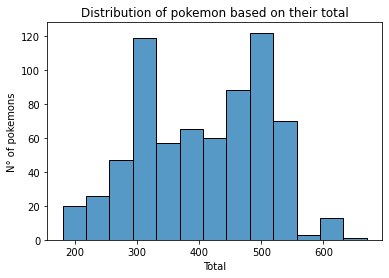

In [27]:
ax3=sns.histplot(data=df_nop,x="Total")
ax3.set(title="Distribution of pokemon based on their total",ylabel="N° of pokemons")
plt.show()

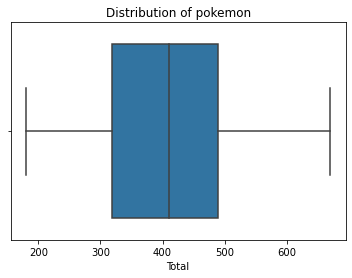

In [28]:
ax4=sns.boxplot(data=df_nop,x="Total")
ax4.set(title="Distribution of pokemon")
plt.show()

In [29]:
df_nop.agg({"Total":["mean","min","max","median"]})

Total
mean    405.680174
min     180.000000
max     670.000000
median  411.000000

The histogram and the boxplot as well as the statistics give us an idea of how the pokemon are distributed based on their total. For instance, we can observe that the first quartile goest up to 320, the second quartile goes up to 410, the third quartile goes up to 500 and the last quartile goes up to 670. 

Based on this data we proposse to categorize pokemons in 4 groups:

- **Very weaks = 180 to 320**
- **Weaks = 321 to 410**
- **Strongs = 411 to 500**
- **Elites = 501 to 670**

In [30]:
df_nop["Level"]="Hola"

for i in range(691):
    if df_nop.iloc[i,12]<321:
        df_nop.iloc[i,15]="Very weak"
    elif df_nop.iloc[i,12]<411:
        df_nop.iloc[i,15]="Weak"
    elif df_nop.iloc[i,12]<501:
        df_nop.iloc[i,15]="Strong"
    elif df_nop.iloc[i,12]<671:
        df_nop.iloc[i,15]="Elite"

<ipython-input-30-36206cb5a13c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nop["Level"]="Hola"
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [31]:
df_nop

#                 Name  Type 1  Type 2  HP  Attack  Defense  Sp. Atk  \
0      1            Bulbasaur   Grass  Poison  45      49       49       65   
1      2              Ivysaur   Grass  Poison  60      62       63       80   
2      3             Venusaur   Grass  Poison  80      82       83      100   
4      4           Charmander    Fire       0  39      52       43       60   
5      5           Charmeleon    Fire       0  58      64       58       80   
..   ...                  ...     ...     ...  ..     ...      ...      ...   
787  711  GourgeistSuper Size   Ghost   Grass  85     100      122       58   
788  712             Bergmite     Ice       0  55      69       85       32   
789  713              Avalugg     Ice       0  95     117      184       44   
790  714               Noibat  Flying  Dragon  40      30       35       45   
791  715              Noivern  Flying  Dragon  85      70       80       97   

     Sp. Def  Speed  Generation  Legendary  Total Labeled generation  \
0         65     45           1      False    318              Kanto   
1         80     60           1      False    405              Kanto   
2        100     80           1      False    525              Kanto   
4         50     65           1      False    309              Kanto   
5         65     80           1      False    405              Kanto   
..       ...    ...         ...        ...    ...                ...   
787       75     54           6      False    494              Kalos   
788       35     28           6      False    304              Kalos   
789       46     28           6      False    514              Kalos   
790       40     55           6      False    245              Kalos   
791       80    123           6      False    535              Kalos   

     N° of pokemon      Level  
0                1  Very weak  
1                1       Weak  
2                1      Elite  
4                1  Very weak  
5                1       Weak  
..             ...        ...  
787              1     Strong  
788              1  Very weak  
789              1      Elite  
790              1  Very weak  
791              1      Elite  

[691 rows x 16 columns]

Now that we have labeled all pokemon based on their total, we will plot the results in a barplot

In [32]:
levelpokemon=df_nop.groupby("Level").agg({"N° of pokemon":"count"})
levelpokemon=levelpokemon.reset_index()
levelpokemon

Level  N° of pokemon
0      Elite            118
1     Strong            229
2  Very weak            183
3       Weak            161

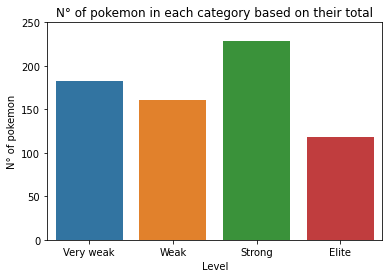

In [33]:
ax5=sns.barplot(data=levelpokemon,x="Level",y="N° of pokemon",order=["Very weak","Weak","Strong","Elite"])
ax5.set(title="N° of pokemon in each category based on their total", ylim=(0,250))
plt.show()

To go even further, we can create a barplot that show the difference among generations

In [34]:
levelpokemon3=df_nop.groupby(["Labeled generation","Level"]).agg({"Total":"count"})

levelpokemon3=levelpokemon3.reset_index()

levelpokemon3.sort_values("Level",ascending=True)

Labeled generation      Level  Total
0               Hoenn      Elite     11
16             Sinnoh      Elite     33
12              Kanto      Elite     21
4               Jhoto      Elite     13
8               Kalos      Elite     14
20            Teselia      Elite     26
13              Kanto     Strong     47
17             Sinnoh     Strong     28
9               Kalos     Strong     25
5               Jhoto     Strong     31
21            Teselia     Strong     54
1               Hoenn     Strong     44
10              Kalos  Very weak     16
22            Teselia  Very weak     40
2               Hoenn  Very weak     41
14              Kanto  Very weak     40
6               Jhoto  Very weak     26
18             Sinnoh  Very weak     20
19             Sinnoh       Weak     22
11              Kalos       Weak     19
7               Jhoto       Weak     24
3               Hoenn       Weak     29
15              Kanto       Weak     38
23            Teselia       Weak     29

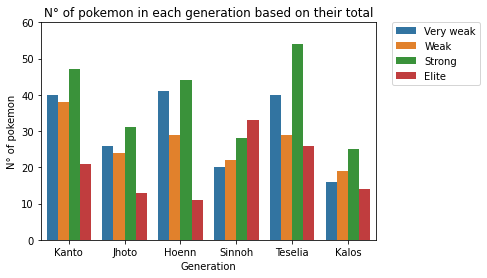

In [35]:
ax6=sns.barplot(data=levelpokemon3, x="Labeled generation",y="Total",hue="Level",order=['Kanto', 'Jhoto', 'Hoenn', 'Sinnoh', 'Teselia', 'Kalos'],hue_order=['Very weak', 'Weak', 'Strong', 'Elite'])

ax6.set(title="N° of pokemon in each generation based on their total",ylabel="N° of pokemon",xlabel="Generation",ylim=(0,60))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

**Interpretation** Based on the last graphic, we can say that in the fourth generation (Sinnoh) there were introduced more elite pokemon than in any other generation. What is more, in Sinnoh there are more elite pokemon than pokemon of the other three levels we have just created.

## QUESTION 6: If we choose the best pokemon for each feature in every type of pokemon, how would the team look like for each type? Which team would be the more balanced?

To answer this question, we would just consider non legendary nor mega pokemons (i.e. df_nop)

### First, we need to create subsets that contain every kind of pokemon. 

This means, for example, that every pokemon that has "Fire" as his Type 1 or 2 would be inserted in a specific dataframe called **Fire_type**

In [36]:
types=list(df_nop["Type 1"].unique())

types_pokemon=[]

len(types)


18

In [37]:
for i in range(len(types)):
    a="_type"
    b=str(types[i])
    globals()[b+a]=df_nop.loc[(df["Type 1"]==types[i])|(df["Type 2"]==types[i])]
    types_pokemon.append(globals()[b+a])

### Now we have to select the best 6 pokemons for each type. 

For example, we will select the best Fire pokemon in Attack, the best Fire pokemon in Defense and so on for every type

In [38]:
#First we need to create empty list that will contain the selected pokemons for each type
for i in range(len(types_pokemon)):
    a="_selected"
    b=str(types[i])
    globals()[b+a]=[]

In [39]:
#Now we select the best pokemons on each type
for i in range(len(types_pokemon)):
    for e in range(len(features)):
        a="_selected"
        b=str(types[i])
        c="Top_"
        df_1=types_pokemon[i].sort_values(features[e],ascending=False).head(1)
        globals()[b+a].append(df_1)
        globals()[c+b]=pd.DataFrame(np.concatenate(globals()[b+a]))

In [40]:
#Now we introduce column names to each selected team

columns=df_nop.columns

for i in range(len(types_pokemon)):
    a="Top_"
    b=str(types[i])
    globals()[a+b].columns=columns

### Now that we have the best possible team for each type, we can start to analyze which team is the most balanced

First, lets check what type of pokemon each team have (elite, strong, weak, very weak)

In [41]:
#In each team created, we create a new column to distinguish from which team they belong (we do this because we are going to merge all the teams selected in one dataset)

for i in range(len(types_pokemon)):
    a="Top_"
    b=str(types[i])
    globals()[a+b]["Selected"]="Team "+str(types[i])


In [42]:
#Now, we congregate all the selected pokemon in just one dataset called selected
selected=[]
for i in range(len(types)):
    a="Top_"
    b=str(types[i])
    selected.append(globals()[a+b])    
selected=pd.DataFrame(np.concatenate(selected))

In [43]:
#We give the column names to the new dataset

columns2=Top_Poison.columns
selected.columns=columns2

selected

#        Name Type 1    Type 2   HP Attack Defense Sp. Atk Sp. Def  \
0    673      Gogoat  Grass         0  123    100      62      97      81   
1    286     Breloom  Grass  Fighting   60    130      80      60      60   
2    598  Ferrothorn  Grass     Steel   74     94     131      54     116   
3    407    Roserade  Grass    Poison   60     70      65     125     105   
4    598  Ferrothorn  Grass     Steel   74     94     131      54     116   
..   ...         ...    ...       ...  ...    ...     ...     ...     ...   
103  567    Archeops   Rock    Flying   75    140      65     112      65   
104  227    Skarmory  Steel    Flying   65     80     140      40      70   
105  468    Togekiss  Fairy    Flying   85     50      95     120     115   
106  226     Mantine  Water    Flying   65     40      70      80     140   
107  291     Ninjask    Bug    Flying   61     90      45      50      50   

    Speed Generation Legendary Total Labeled generation N° of pokemon   Level  \
0      68          6     False   531              Kalos             1   Elite   
1      70          3     False   460              Hoenn             1  Strong   
2      20          5     False   489            Teselia             1  Strong   
3      90          4     False   515             Sinnoh             1   Elite   
4      20          5     False   489            Teselia             1  Strong   
..    ...        ...       ...   ...                ...           ...     ...   
103   110          5     False   567            Teselia             1   Elite   
104    70          2     False   465              Jhoto             1  Strong   
105    80          4     False   545             Sinnoh             1   Elite   
106    70          2     False   465              Jhoto             1  Strong   
107   160          3     False   456              Hoenn             1  Strong   

        Selected  
0     Team Grass  
1     Team Grass  
2     Team Grass  
3     Team Grass  
4     Team Grass  
..           ...  
103  Team Flying  
104  Team Flying  
105  Team Flying  
106  Team Flying  
107  Team Flying  

[108 rows x 17 columns]

### Now we are ready to compare each team in a efficent way

Be aware that the dtypes in each column is adequate. We can check the type of data with the command dtypes, and we can change them with the commnad astype()

In [44]:
selected["Total"]=selected["Total"].astype(int)

selected_df=pd.DataFrame(selected.groupby("Selected").agg({"Total":["mean","median","max","min","std"]}).reset_index())

selected_df

Selected       Total                            
                         mean median  max  min        std
0        Team Bug  504.333333  505.0  550  456  30.408332
1       Team Dark  538.833333  517.5  600  488  48.827929
2     Team Dragon  566.000000  570.0  600  521  37.762415
3   Team Electric  511.666667  527.5  540  460  33.565856
4      Team Fairy  489.166667  490.0  552  435  43.471447
5   Team Fighting  529.500000  517.5  600  474  50.839945
6       Team Fire  503.666667  509.5  528  470  24.614359
7     Team Flying  499.333333  481.5  567  456  46.693326
8      Team Ghost  501.000000  510.0  520  448  27.935640
9      Team Grass  502.333333  502.0  531  460  27.911766
10    Team Ground  490.833333  505.0  535  405  50.340507
11       Team Ice  516.500000  519.5  535  485  18.096961
12    Team Normal  562.500000  540.0  670  490  63.225786
13    Team Poison  495.500000  492.0  535  464  22.958658
14   Team Psychic  540.833333  570.0  600  405  78.257055
15      Team Rock  506.000000  505.0  521  495  10.488088
16     Team Steel  511.166667  515.0  525  484  14.811032
17     Team Water  512.500000  512.5  580  465  42.041646

#### Now the question is which statistics would lead us to select the best team? We can just choose the highest mean for the total, but we also have to consider de standard deviation as a metric that show how compacted is the team.

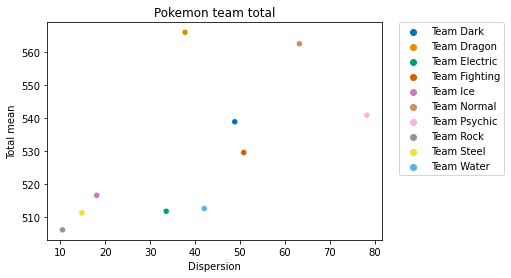

In [45]:
selected_dftop=selected_df.sort_values(('Total','mean'),ascending=False).head(10)

selected_dftop

ax7=sns.scatterplot(data=selected_dftop,y=selected_df[("Total","mean")],x=selected_df[('Total',"std")],hue="Selected",palette="colorblind")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax7.set(title="Pokemon team total",ylabel="Total mean",xlabel="Dispersion")
plt.show()


Based on the average total of the selected pokemons and the dispersion of their totals, the last plot show us that the best team are:

1. **Dragon**
2. **Normal**
3. **Dark** (better than Psychic team because they are less dispersed one from each other in the team)
4. **Psychic**
5. **Fighting**

In [46]:
for i in range(len(Top_Dragon["Name"])):
    print("The best team is conformed by:", Top_Dragon.iloc[i,1])
    
for e in range(len(Top_Normal["Name"])):
    print("The second best team is conformed by:", Top_Normal.iloc[e,1])

The best team is conformed by: Garchomp
The best team is conformed by: Haxorus
The best team is conformed by: Tyrantrum
The best team is conformed by: Hydreigon
The best team is conformed by: Goodra
The best team is conformed by: Noivern
The second best team is conformed by: Blissey
The second best team is conformed by: Slaking
The second best team is conformed by: Miltank
The second best team is conformed by: Porygon-Z
The second best team is conformed by: Blissey
The second best team is conformed by: MeloettaPirouette Forme


## Best exclusive type teams:

### Position 1: Dragons (Average Total= 570 , Std= 37)

Dragon HP - Garchomp|Dragon Attack - Haxorus|Dragon Defense - Tyrantrum|Dragon Sp. Atk- Hydreigon|Dragon Sp. Def - Goodra|Dragon Speed - Noivern
- | - | -| -| -| -
<img src="https://assets.pokemon.com/assets/cms2/img/pokedex/full/445.png" alt="Drawing" style="width: 500px;"/> |<img src="https://assets.pokemon.com/assets/cms2/img/pokedex/full/612.png" alt="Drawing" style="width: 500px;"/>|<img src="https://assets.pokemon.com/assets/cms2/img/pokedex/full//697.png" alt="Drawing" style="width: 500px;"/>|<img src="https://i.pinimg.com/originals/5e/74/ee/5e74ee969d4ab42af256393334f1b429.png" alt="Drawing" style="width: 500px;"/>|<img src="https://media.redadn.es/poke/i/pokedex/ken/706.png" alt="Drawing" style="width: 500px;"/>|<img src="https://i.pinimg.com/originals/79/a0/37/79a0371753bf2bf68c7f7268d00abada.png" alt="Drawing" style="width: 500px;"/>

### Position 2 : Normals (Average Total = 562, Std= 63)

Normal HP - Blissey|Normal Attack - Slaking|Normal Defense - Militank|Normal Sp. Atk- Porygon Z|Normal Sp. Def - Blissey|Normal Speed - Meloetta
- | - | -| -| -| -
<img src="https://assets.pokemon.com/assets/cms2/img/pokedex/full/242.png" alt="Drawing" style="width: 500px;"/> |<img src="https://assets.pokemon.com/assets/cms2/img/pokedex/full/289.png" alt="Drawing" style="width: 500px;"/> |<img src="https://assets.pokemon.com/assets/cms2/img/pokedex/full/241.png" alt="Drawing" style="width: 500px;"/> |<img src="https://assets.pokemon.com/assets/cms2/img/pokedex/full/474.png" alt="Drawing" style="width: 500px;"/> | <img src="https://assets.pokemon.com/assets/cms2/img/pokedex/full/242.png" alt="Drawing" style="width: 500px;"/> | <img src="https://static.pokemonpets.com/images/monsters-images-800-800/4090-Meloetta-Pirouette.png" alt="Drawing" style="width: 500px;"/>

## Question7: Is there any correlation between features? Is this correlation more or less strong among each generation?

To answer this question we will use the dataset that excludes legendaries and megas (df_nop). We will see how is the relationship between Attack and Defense, Attack and Speed, and so on with al the features.

### General correlation

First we need to create a matrix of correlation and give a general view to the relationships by using scatterplots

In [47]:
correlation=df_nop[["Attack","Defense","HP","Sp. Atk","Sp. Def","Speed"]]
correlation=correlation.corr(method="pearson")
correlation=pd.DataFrame(correlation)
correlation

Attack   Defense        HP   Sp. Atk   Sp. Def     Speed
Attack   1.000000  0.397058  0.380376  0.231443  0.134466  0.266377
Defense  0.397058  1.000000  0.170139  0.150792  0.449619 -0.059533
HP       0.380376  0.170139  1.000000  0.302201  0.324044  0.103282
Sp. Atk  0.231443  0.150792  0.302201  1.000000  0.454013  0.375628
Sp. Def  0.134466  0.449619  0.324044  0.454013  1.000000  0.189817
Speed    0.266377 -0.059533  0.103282  0.375628  0.189817  1.000000

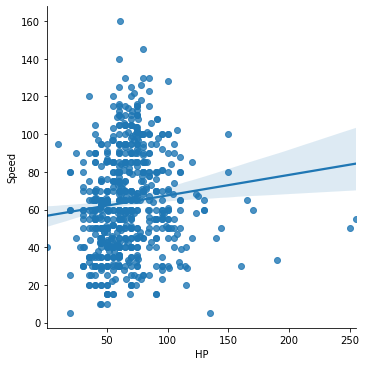

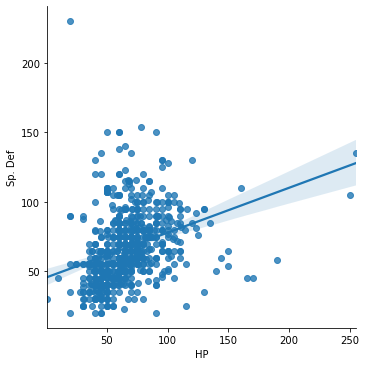

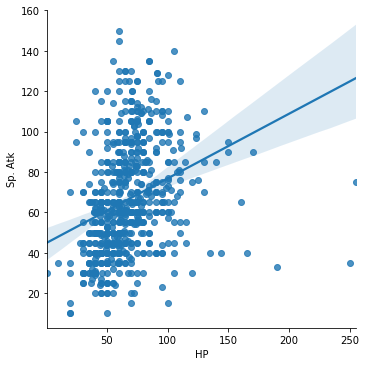

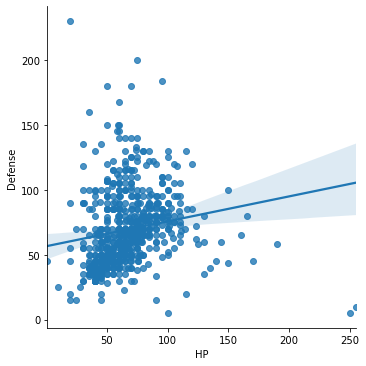

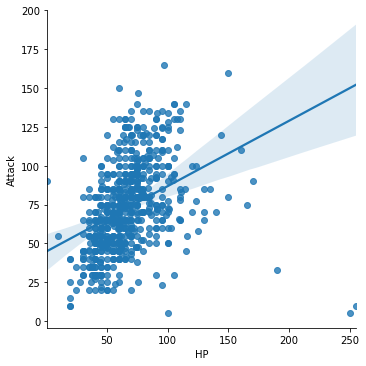

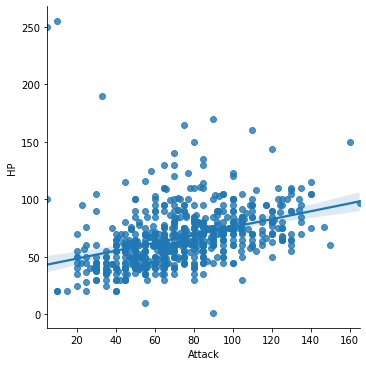

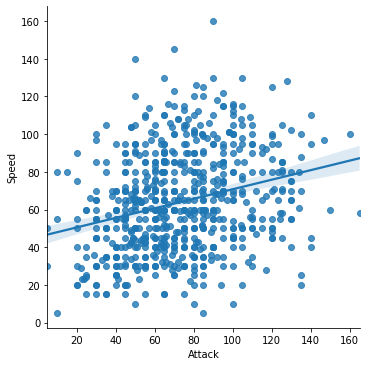

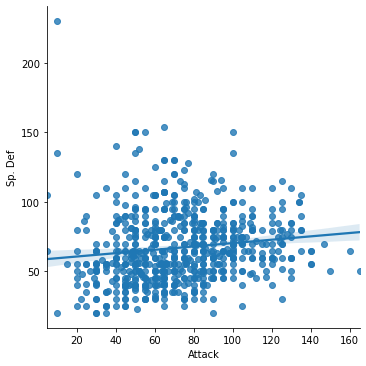

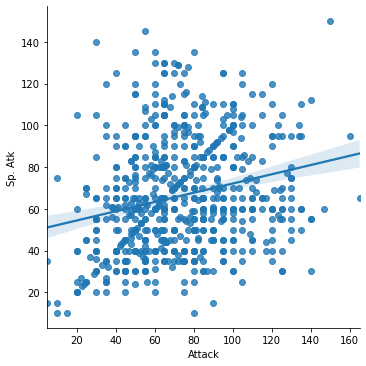

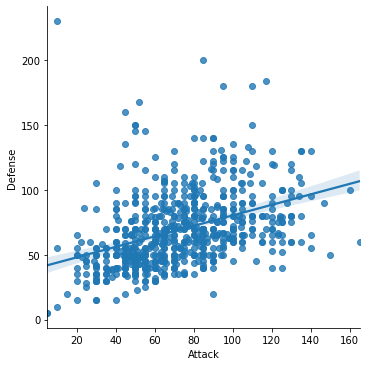

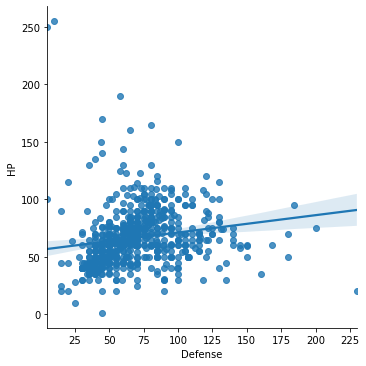

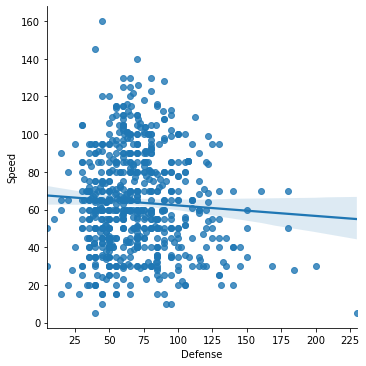

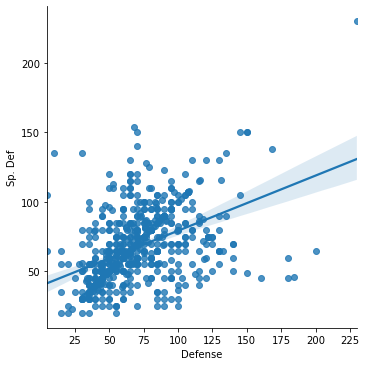

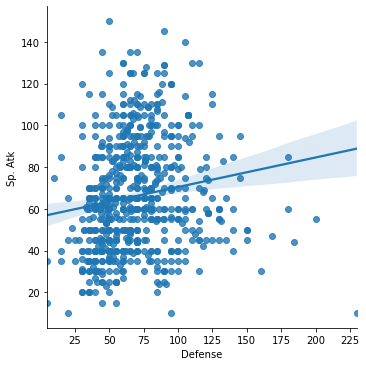

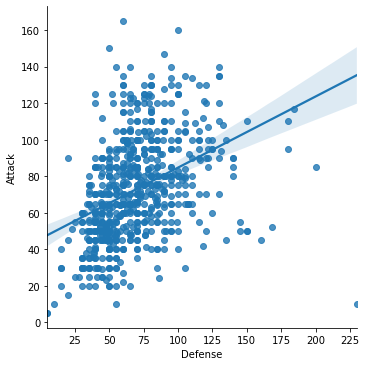

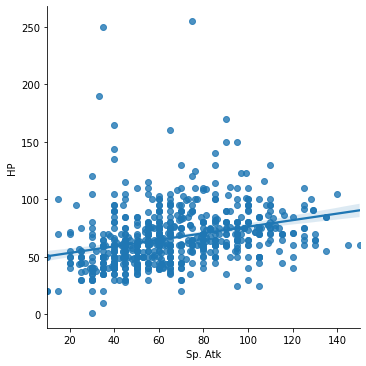

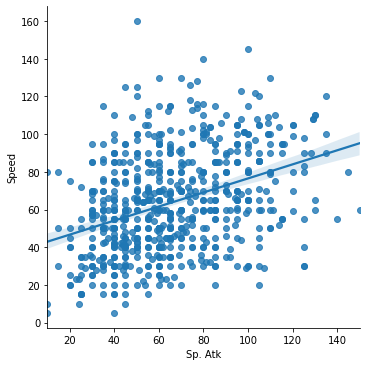

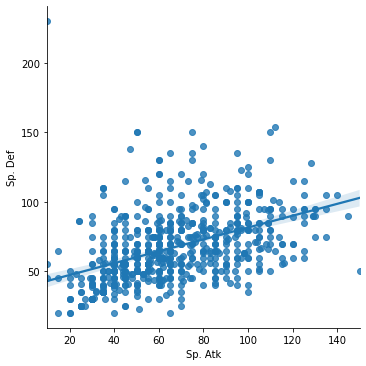

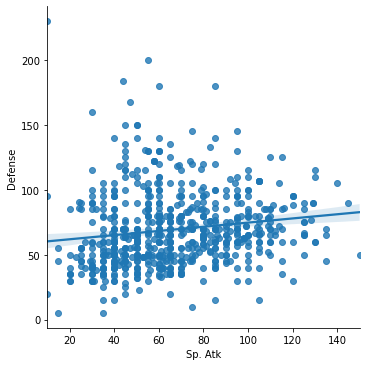

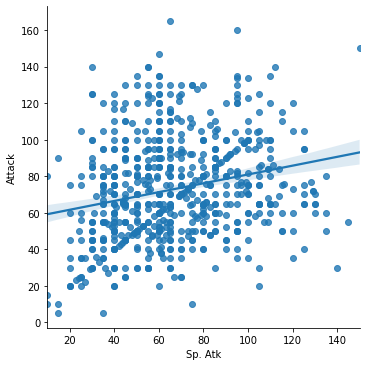

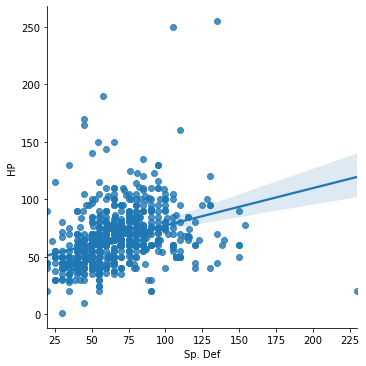

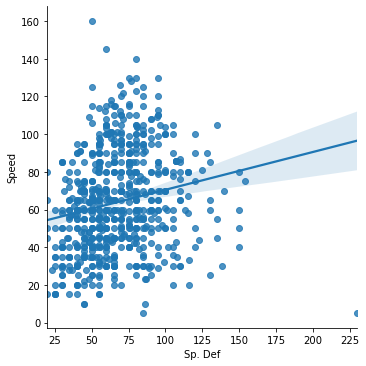

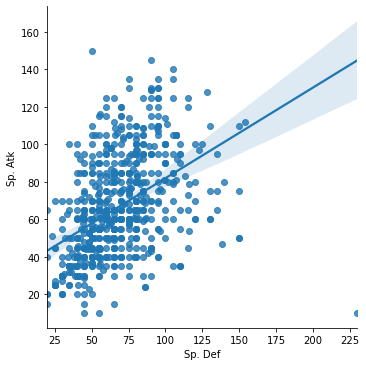

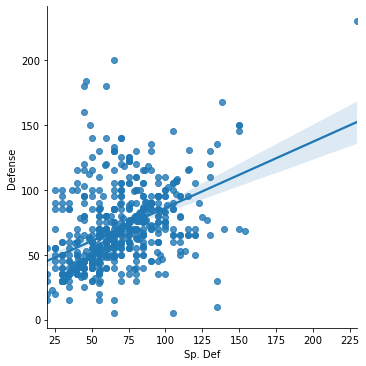

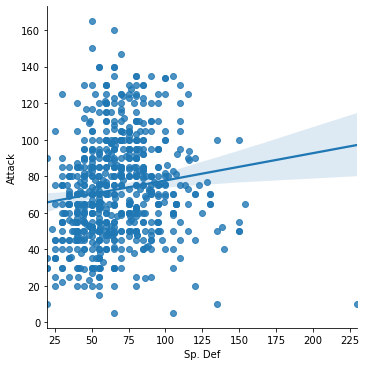

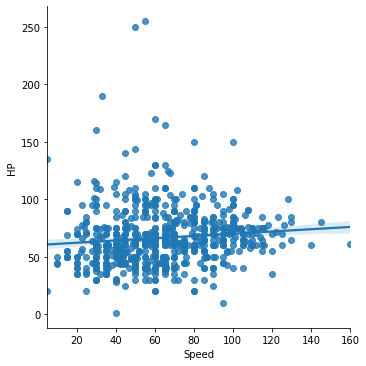

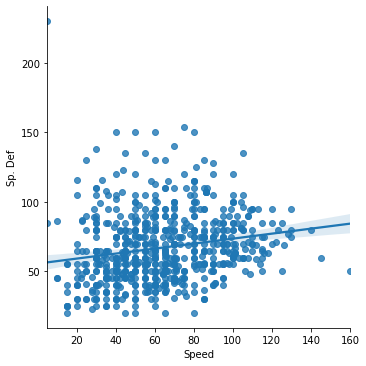

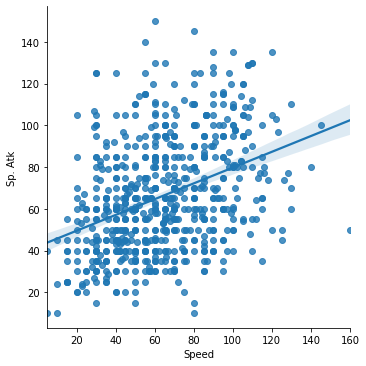

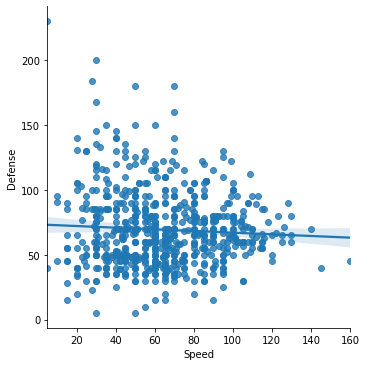

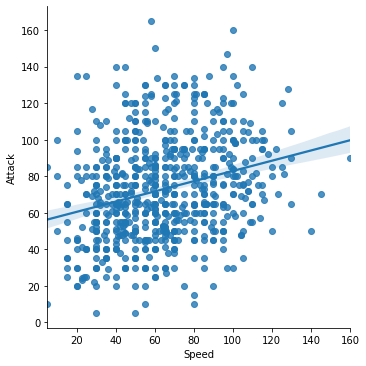

In [48]:
for i in range(len(features)):
    for e in range(len(features)):
        if features[i]!=features[-e]:
            sns.lmplot(data=df_nop,x=features[i],y=features[-e])
            plt.show()

**Now we just want to highlight and plot the stronger correlations** 

By checking the results in the last matrix, we can stablish that the stronger correlations would be those one that are higher than 0.4

In [49]:
correlation[(correlation>0.4)&(correlation<1)].fillna("-")

Attack   Defense HP   Sp. Atk   Sp. Def Speed
Attack       -         -  -         -         -     -
Defense      -         -  -         -  0.449619     -
HP           -         -  -         -         -     -
Sp. Atk      -         -  -         -  0.454013     -
Sp. Def      -  0.449619  -  0.454013         -     -
Speed        -         -  -         -         -     -

<function matplotlib.pyplot.show(close=None, block=None)>

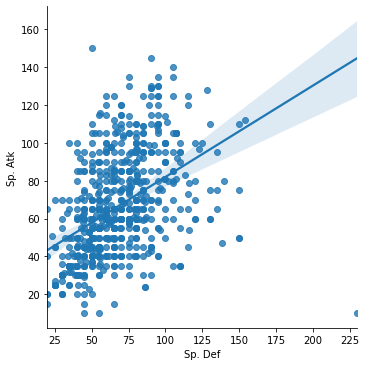

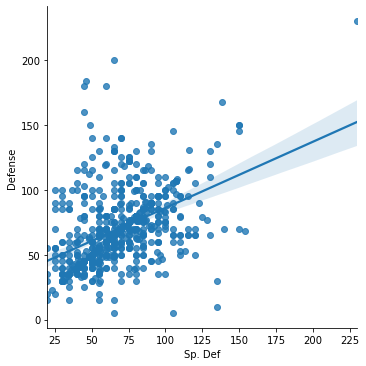

In [50]:
ax8=sns.lmplot(data=df_nop,x="Sp. Def",y="Sp. Atk")
plt.show

ax9=sns.lmplot(data=df_nop,x="Sp. Def",y="Defense")
plt.show

**Interpretation:** For all the non-lengendary nor mega pokemon we can notice that the stronger correlation is between Sp. Defense and Sp. Attack. The second strongest correlation is between Sp. Defense and Defense. Now, lets see if the results are the same if we distinguish among generations

In [51]:
#Now we have to create different databases for each generation

gen=list(df_nop["Labeled generation"].unique())
generation=[]

for i in range(len(gen)):
    a=str(gen[i])
    globals()[a]=df_nop.loc[df["Labeled generation"]==gen[i]]
    generation.append(globals()[a])
    
matrix=[]
    
for i in range(len(generation)):
    a="Corr_"
    b=str(gen[i])
    globals()[a+b]=generation[i][["Attack","Defense","HP","Sp. Atk","Sp. Def","Speed"]]
    matrix.append(globals()[a+b])

In [52]:
#Now we create the different matrix of correlation for each generation

matrix_correlations=[]

for i in range(len(generation)):
    a="matrix_"
    b=str(gen[i])
    globals()[a+b]=matrix[i].corr(method="pearson")
    globals()[a+b]=globals()[a+b].mask(np.tril(np.ones(globals()[a+b].shape)).astype(np.bool))
    matrix_correlations.append(globals()[a+b])

In [53]:
#Now we print the results that are above 0.4 for each generation
generation_matrix=[]
for i in range(len(generation)):
    a="Matrix_"
    b=str(gen[i])
    globals()[a+b]=matrix_correlations[i][(matrix_correlations[i]>0.4)&(matrix_correlations[i]<1)].fillna("-")
    generation_matrix.append(globals()[a+b])
    globals()[a+b]=pd.DataFrame(generation_matrix[i])

In [54]:
def ploting(a,b,c):
    sns.lmplot(data=a,x=b,y=c)
    plt.show()

### Kanto

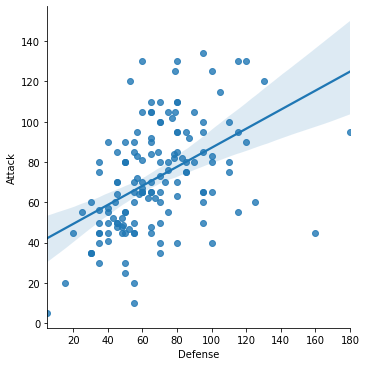

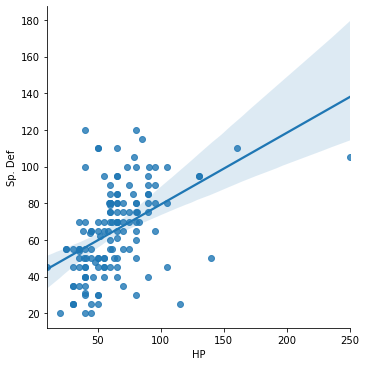

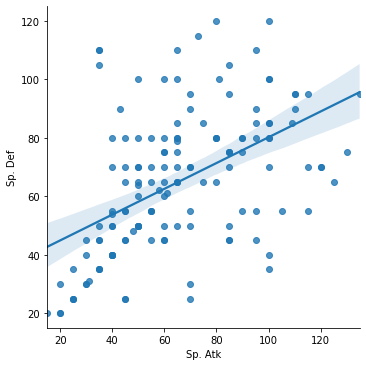

Attack   Defense HP Sp. Atk   Sp. Def Speed
Attack       -  0.478519  -       -         -     -
Defense      -         -  -       -         -     -
HP           -         -  -       -  0.469509     -
Sp. Atk      -         -  -       -  0.501736     -
Sp. Def      -         -  -       -         -     -
Speed        -         -  -       -         -     -

In [55]:
ploting(Corr_Kanto,"Defense","Attack")
ploting(Corr_Kanto,"HP","Sp. Def")
ploting(Corr_Kanto,"Sp. Atk","Sp. Def")

Matrix_Kanto


### Jhoto

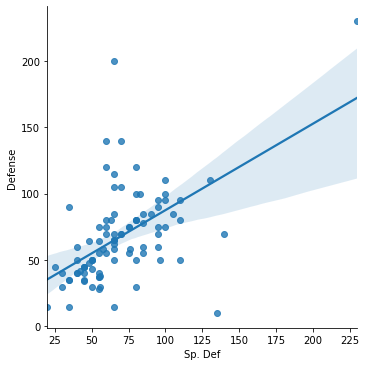

Attack Defense HP Sp. Atk   Sp. Def Speed
Attack       -       -  -       -         -     -
Defense      -       -  -       -  0.546994     -
HP           -       -  -       -         -     -
Sp. Atk      -       -  -       -         -     -
Sp. Def      -       -  -       -         -     -
Speed        -       -  -       -         -     -

In [56]:
ploting(Corr_Jhoto, "Sp. Def","Defense")

Matrix_Jhoto

### Hoenn

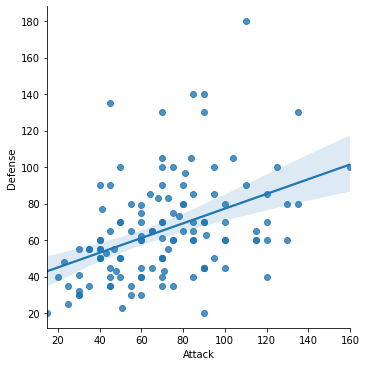

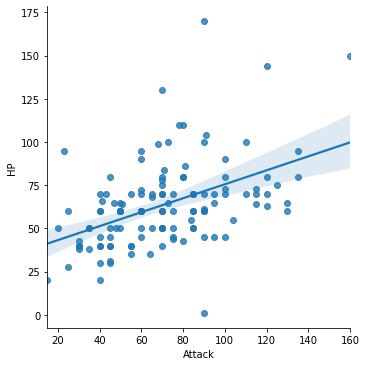

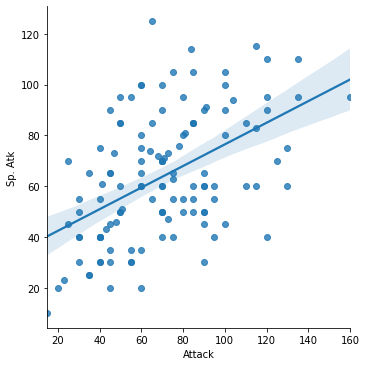

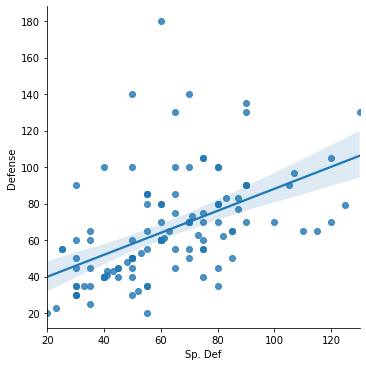

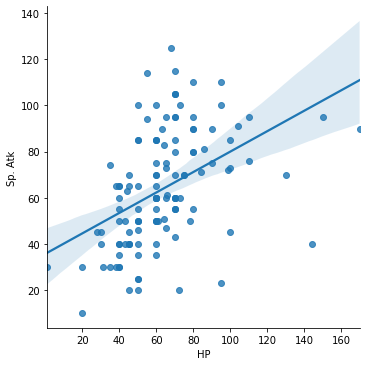

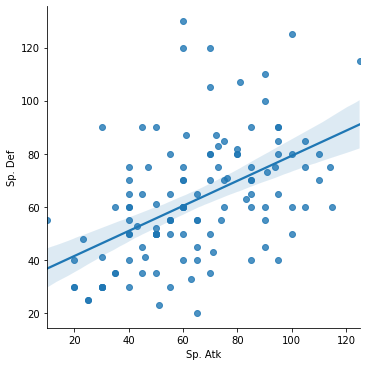

Attack   Defense        HP   Sp. Atk   Sp. Def Speed
Attack       -  0.416748  0.465281  0.496639         -     -
Defense      -         -         -         -   0.50166     -
HP           -         -         -  0.448148         -     -
Sp. Atk      -         -         -         -  0.501639     -
Sp. Def      -         -         -         -         -     -
Speed        -         -         -         -         -     -

In [57]:
ploting(Corr_Hoenn,"Attack","Defense")
ploting(Corr_Hoenn,"Attack","HP")
ploting(Corr_Hoenn,"Attack","Sp. Atk")
ploting(Corr_Hoenn,"Sp. Def","Defense")
ploting(Corr_Hoenn,"HP","Sp. Atk")
ploting(Corr_Hoenn,"Sp. Atk","Sp. Def")

Matrix_Hoenn

### Sinnoh

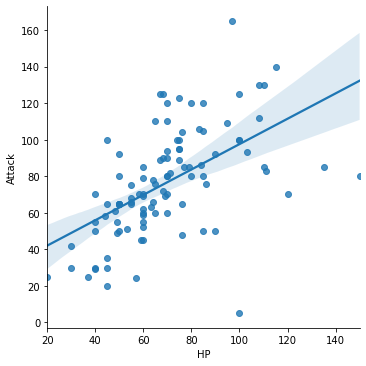

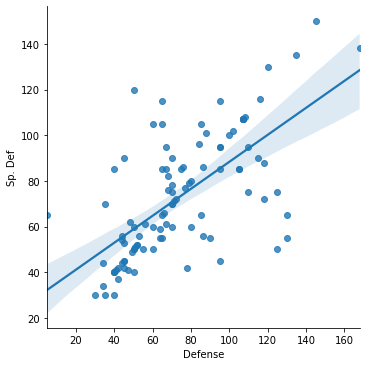

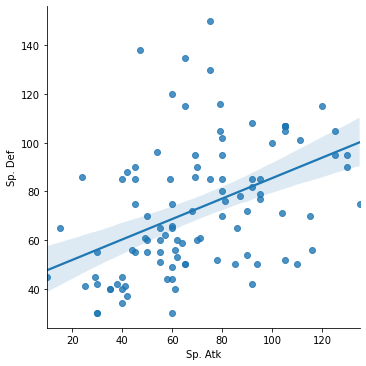

Attack Defense        HP Sp. Atk   Sp. Def Speed
Attack       -       -  0.551514       -         -     -
Defense      -       -         -       -  0.662695     -
HP           -       -         -       -         -     -
Sp. Atk      -       -         -       -  0.442508     -
Sp. Def      -       -         -       -         -     -
Speed        -       -         -       -         -     -

In [58]:
ploting(Corr_Sinnoh,"HP","Attack")
ploting(Corr_Sinnoh,"Defense","Sp. Def")
ploting(Corr_Sinnoh,"Sp. Atk","Sp. Def")
Matrix_Sinnoh

### Teselia

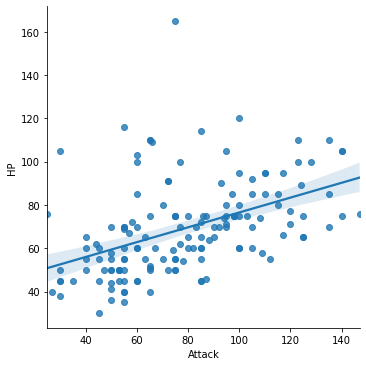

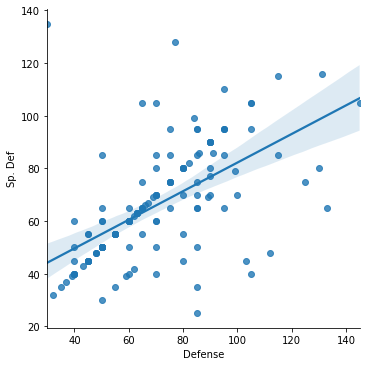

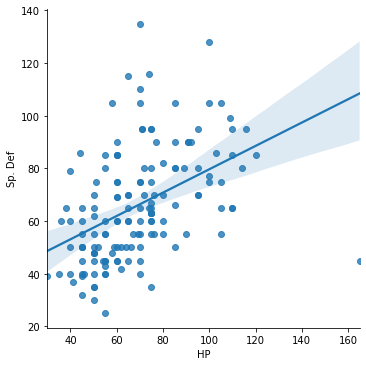

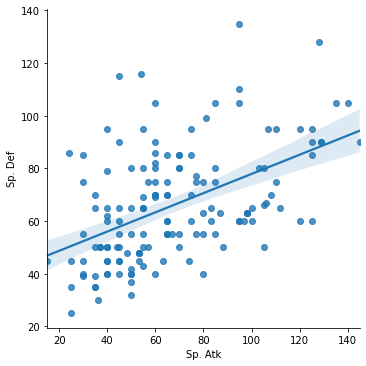

Attack Defense        HP Sp. Atk   Sp. Def Speed
Attack       -       -  0.456532       -         -     -
Defense      -       -         -       -  0.582376     -
HP           -       -         -       -  0.447494     -
Sp. Atk      -       -         -       -  0.496776     -
Sp. Def      -       -         -       -         -     -
Speed        -       -         -       -         -     -

In [59]:
ploting(Corr_Teselia, "Attack","HP")
ploting(Corr_Teselia, "Defense","Sp. Def")
ploting(Corr_Teselia, "HP","Sp. Def")
ploting(Corr_Teselia, "Sp. Atk","Sp. Def")

Matrix_Teselia

### Kalos

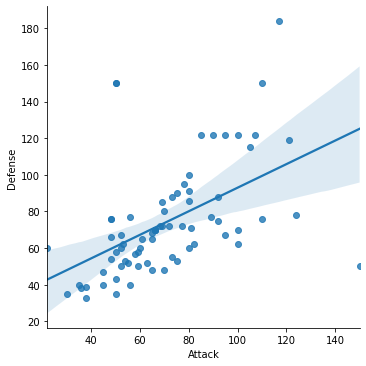

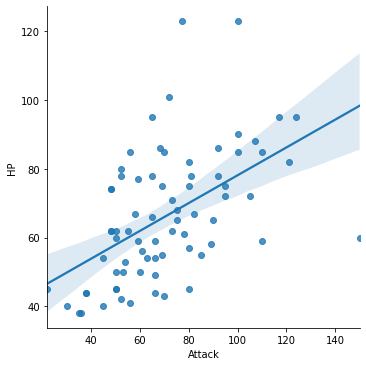

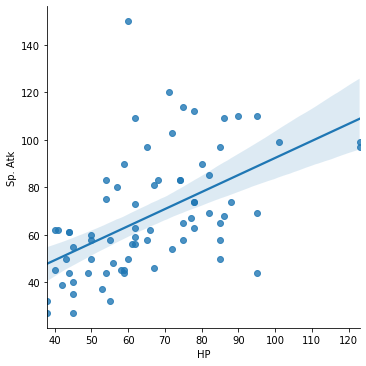

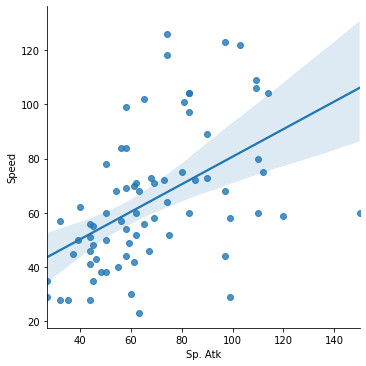

Attack   Defense        HP   Sp. Atk   Sp. Def     Speed
Attack       -  0.513123  0.522712         -         -         -
Defense      -         -         -         -         -         -
HP           -         -         -  0.533781         -         -
Sp. Atk      -         -         -         -  0.518394  0.500074
Sp. Def      -         -         -         -         -         -
Speed        -         -         -         -         -         -

In [60]:
ploting(Corr_Kalos,"Attack","Defense")
ploting(Corr_Kalos,"Attack","HP")
ploting(Corr_Kalos,"HP","Sp. Atk")
ploting(Corr_Kalos,"Sp. Atk","Speed")
Matrix_Kalos

**Interpretation:** By checking the stronger correlations in each generation we can highlight that the first three generations (Kanto, Jhoto & Hoenn) present less and weaker correlations. On the other hand, we can distinguish that the strongest correlations was in Sinnoh between Defense and Sp Defense. This can lead us to state that Sinnoh has the most defensive pokemon (the level of defense is directly correlated with the level of sp. defense in most of their pokemon)

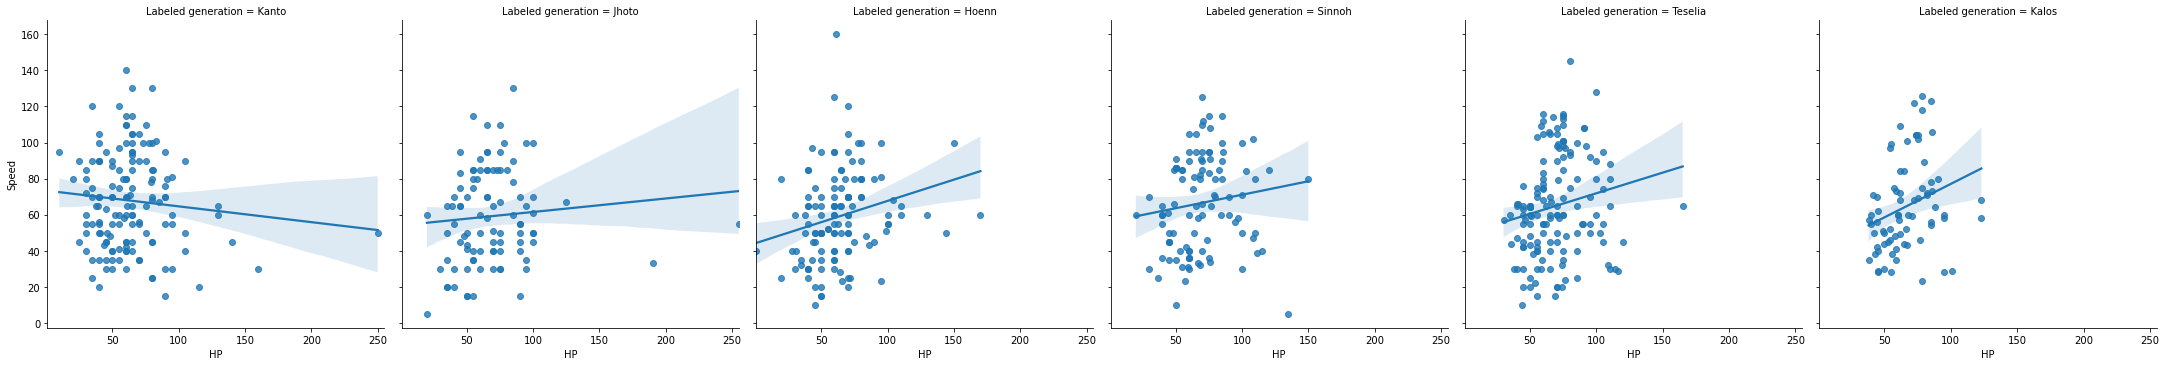

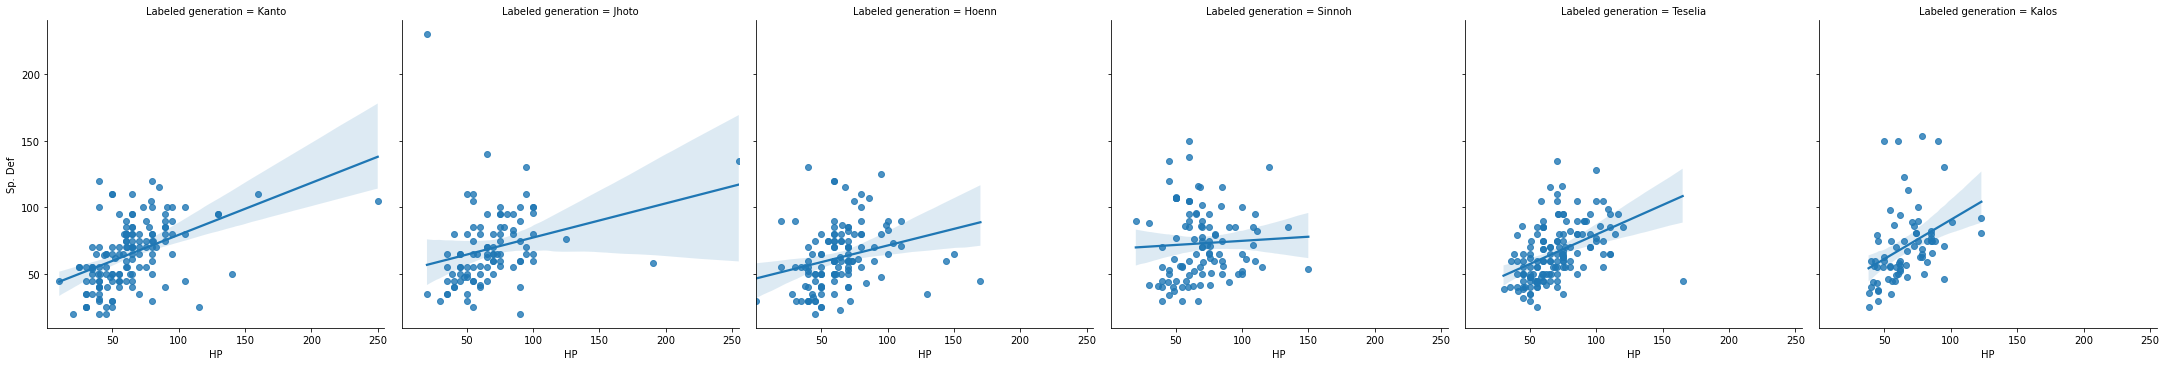

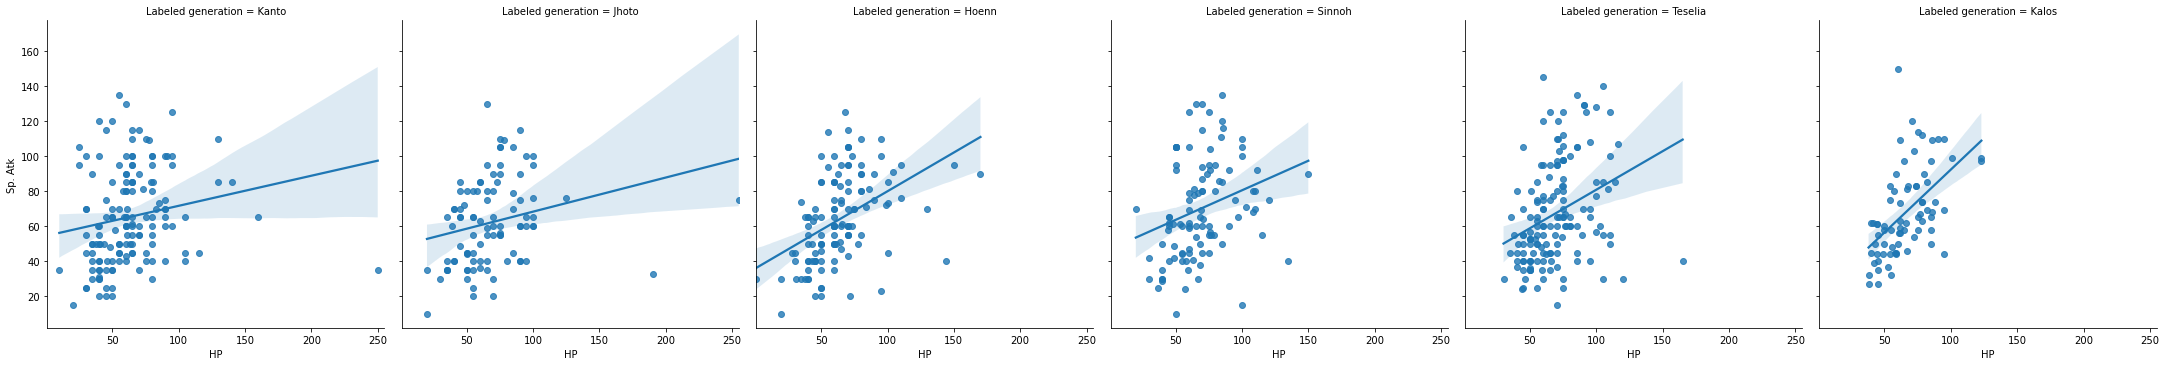

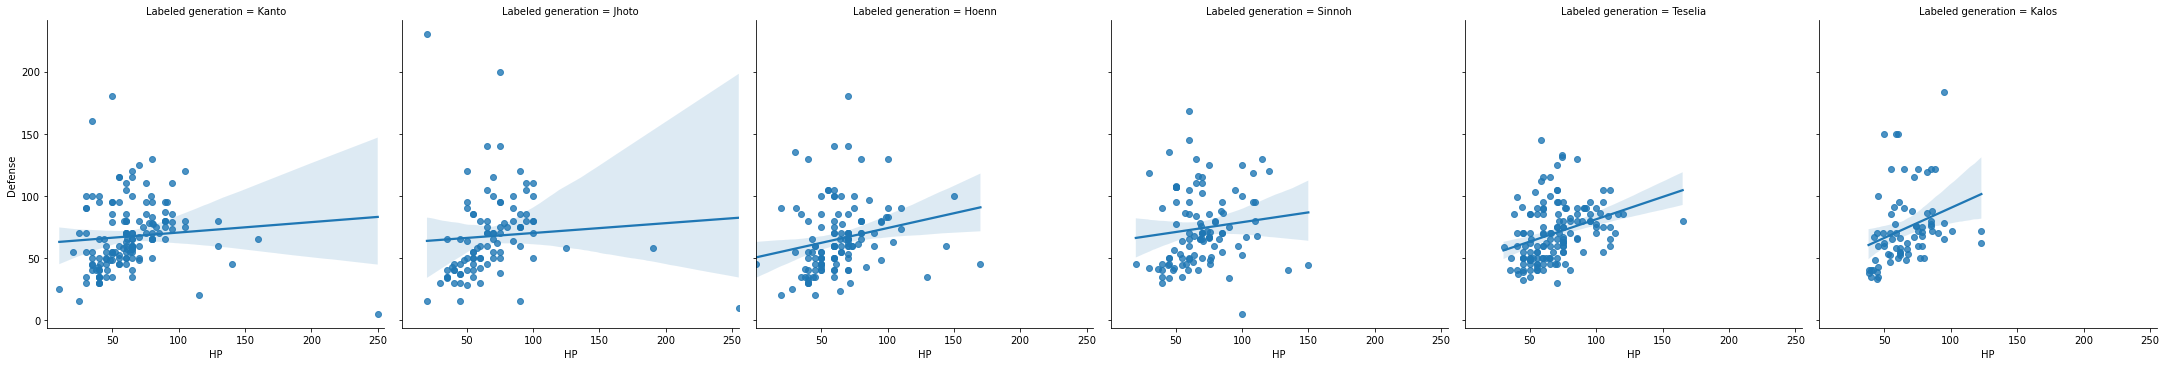

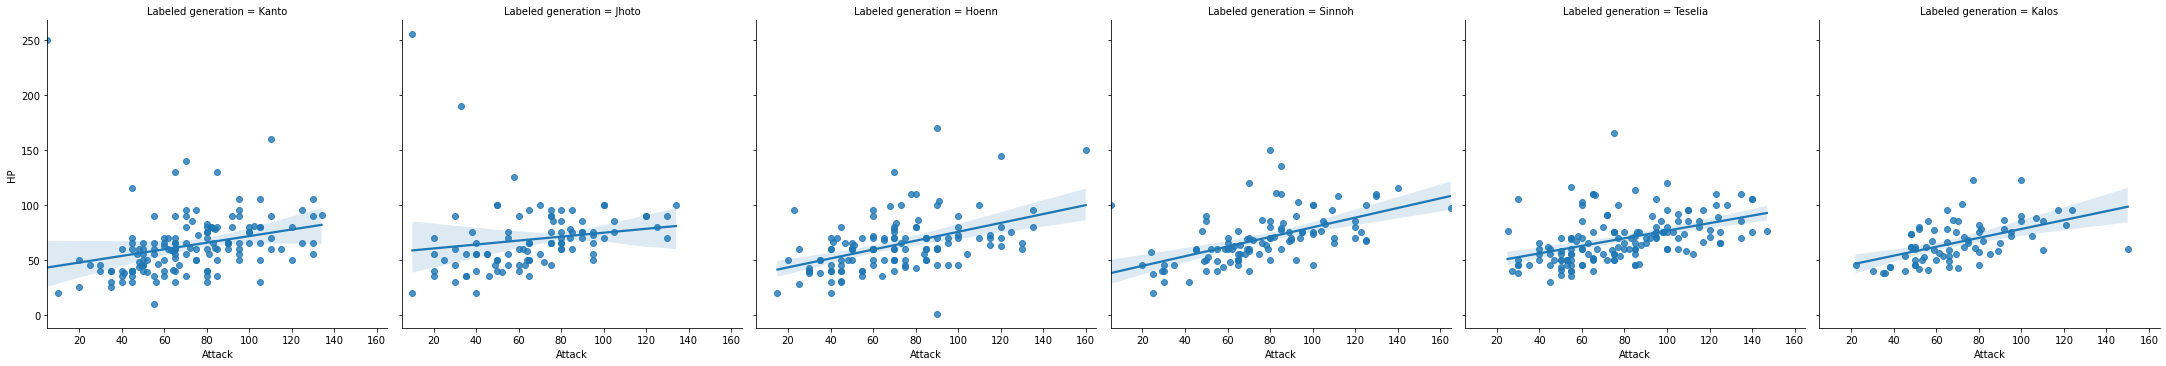

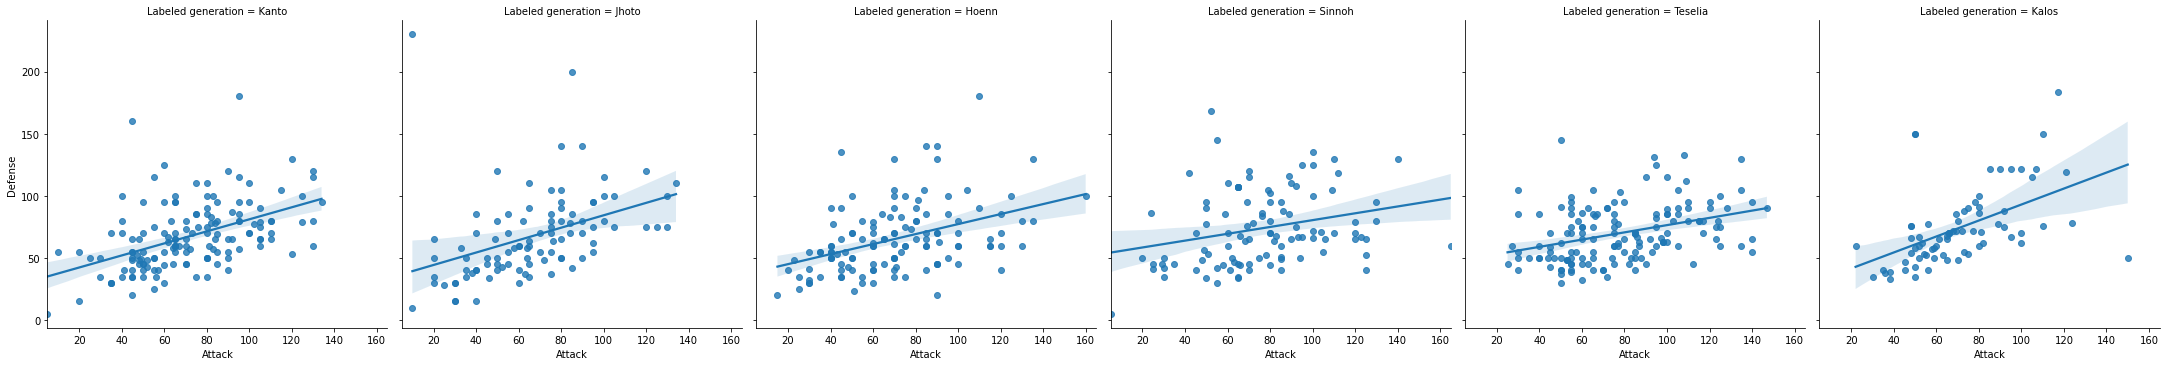

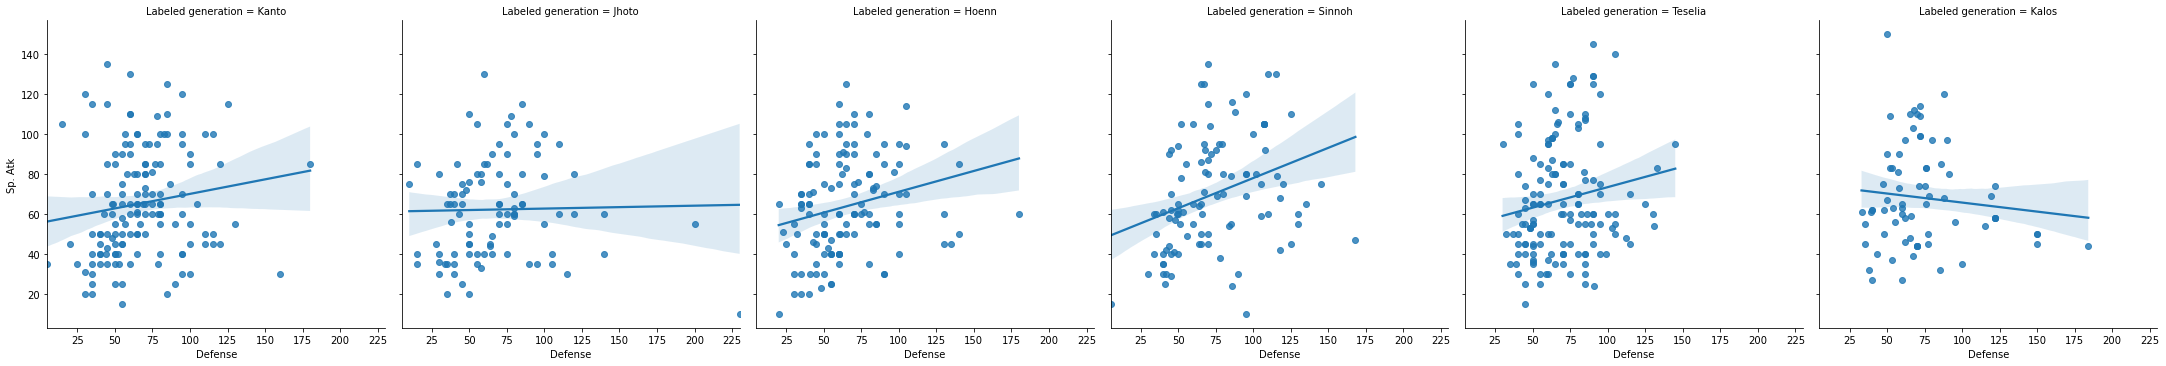

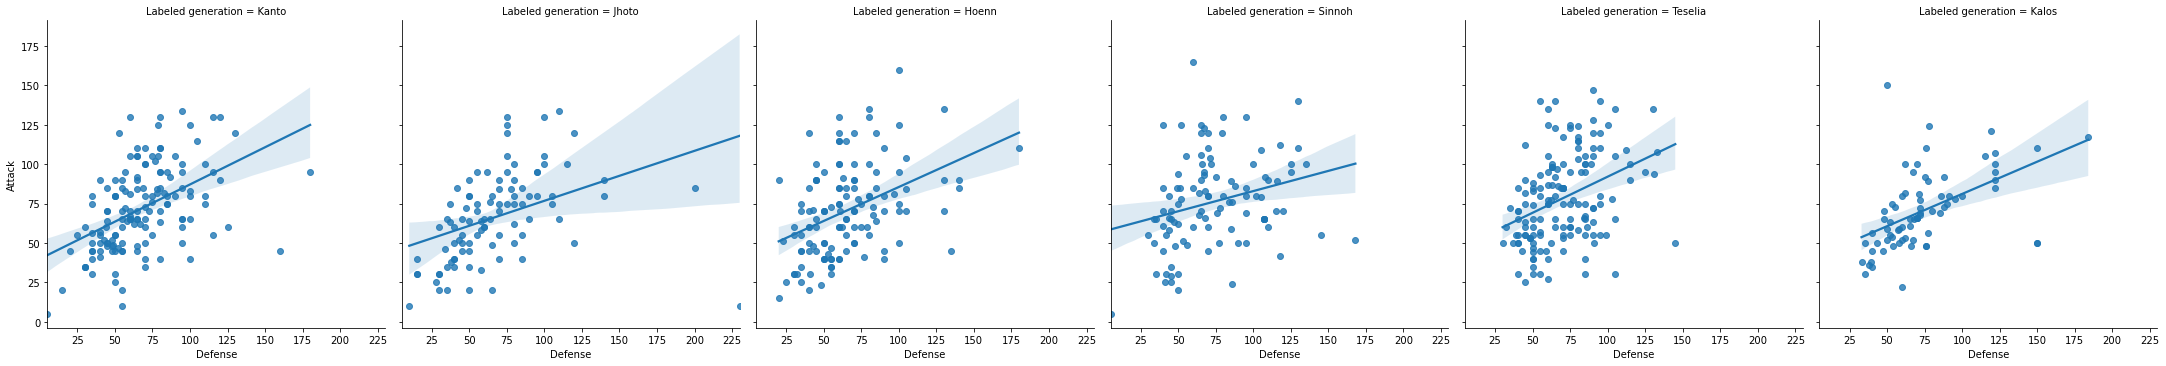

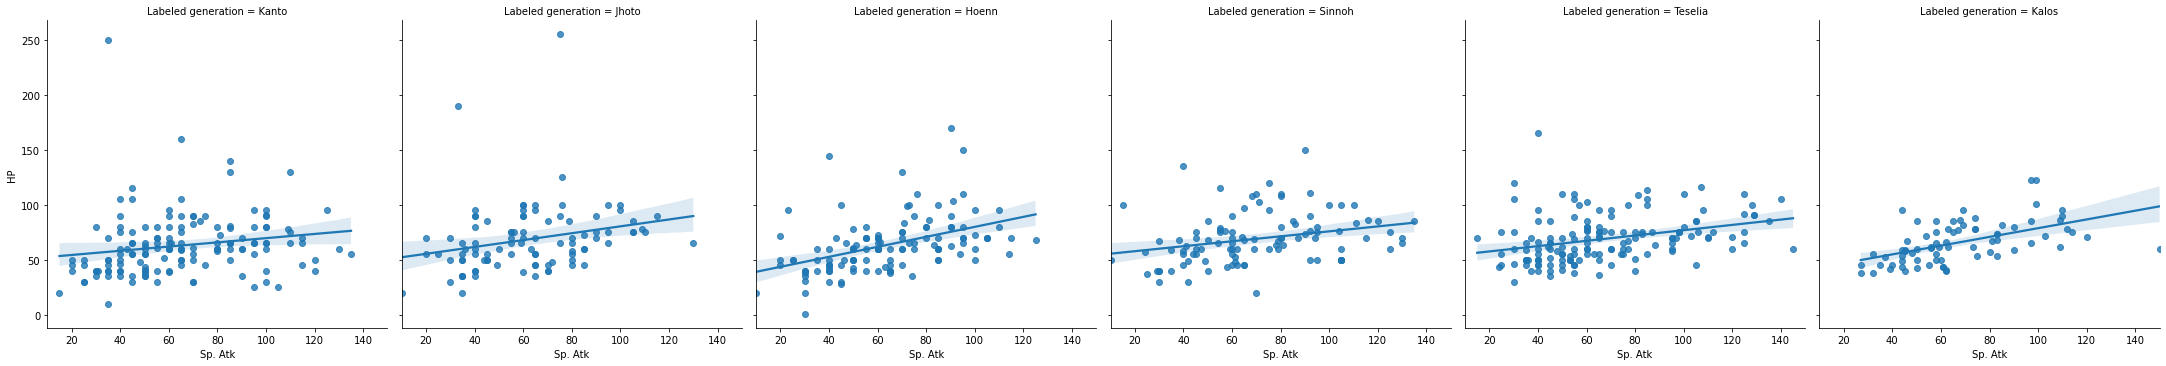

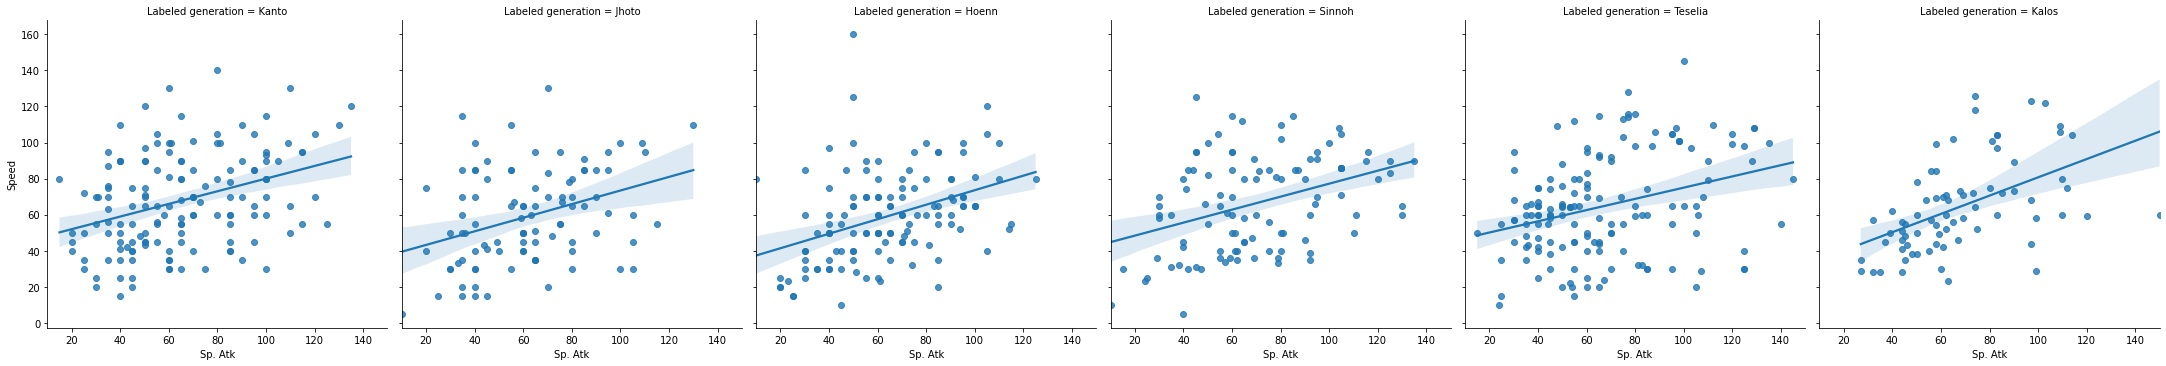

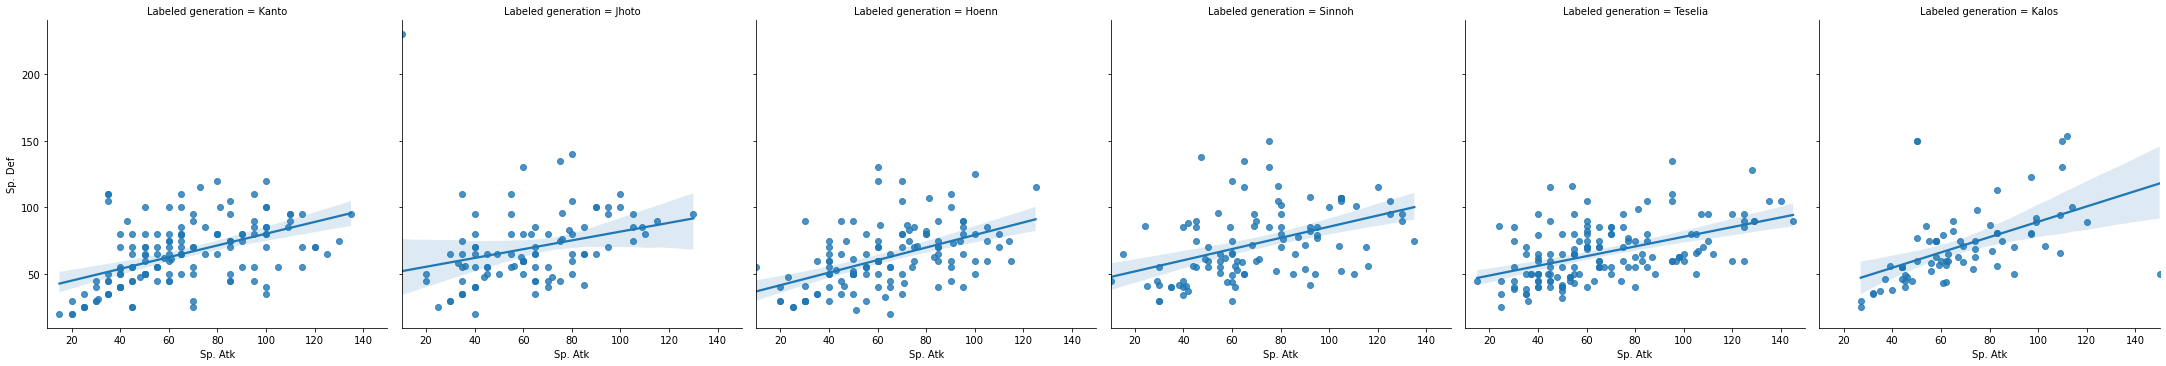

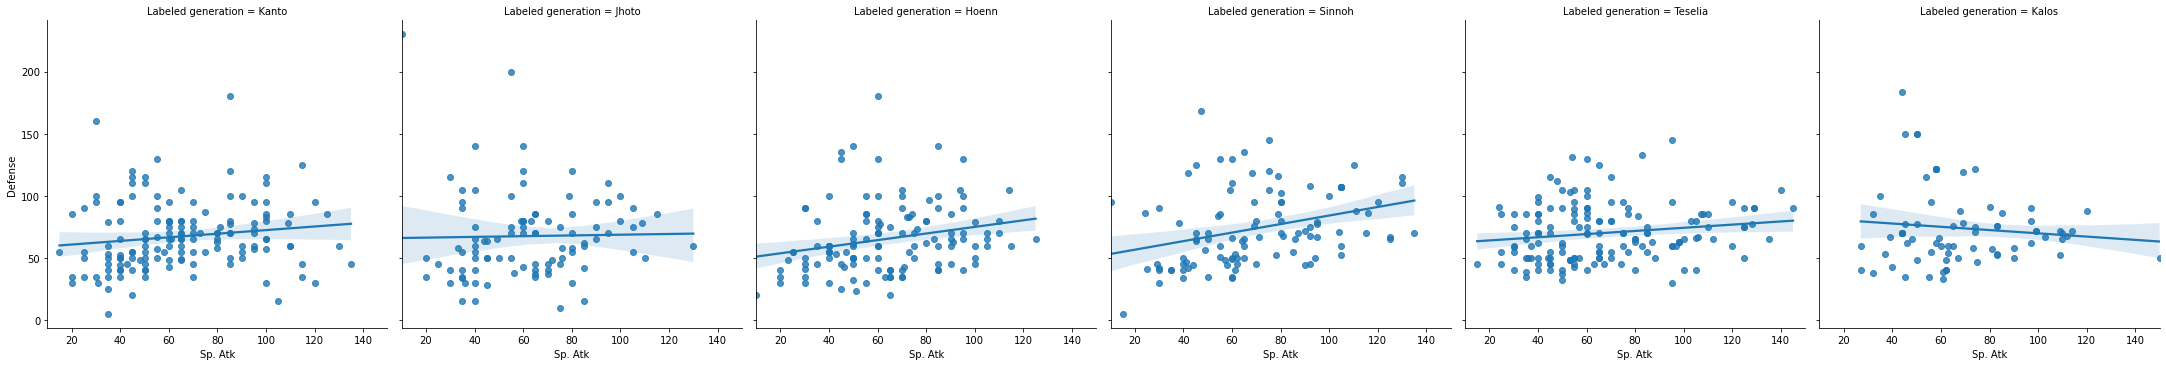

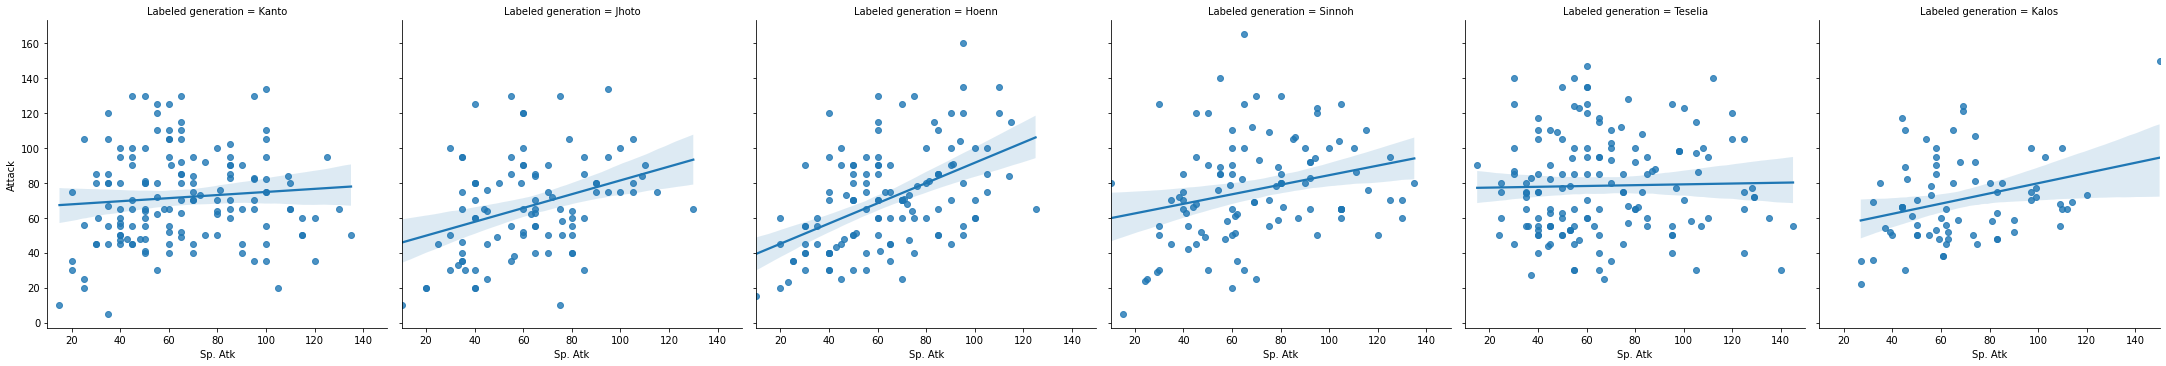

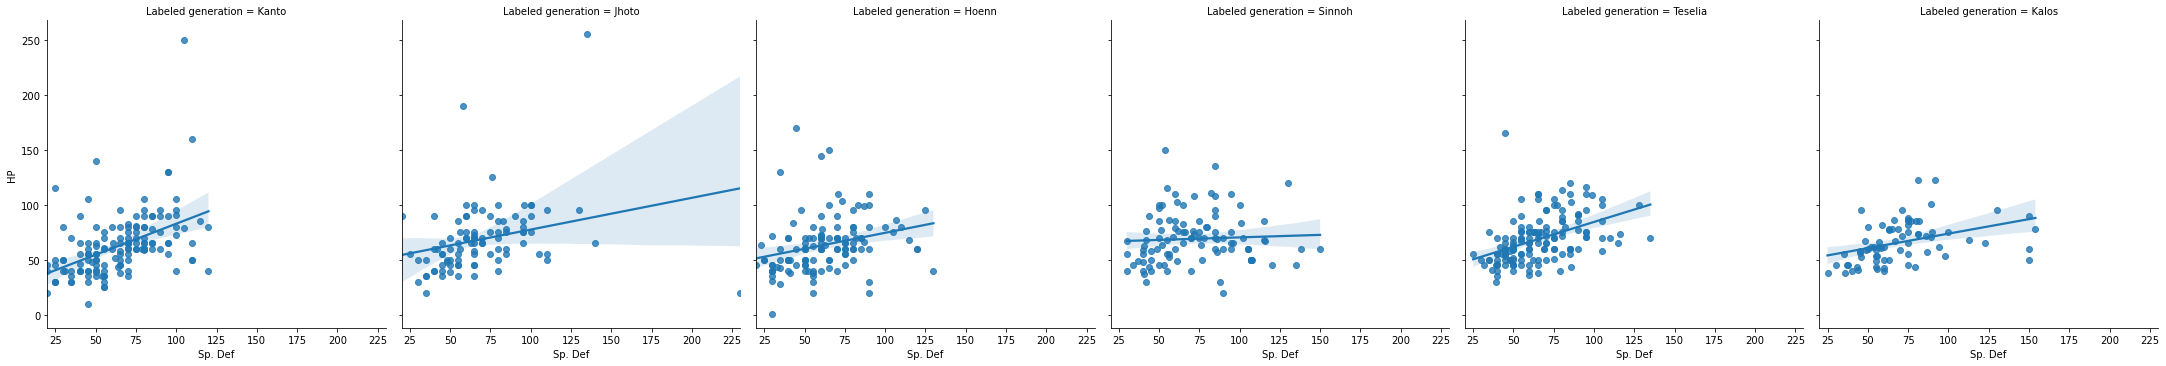

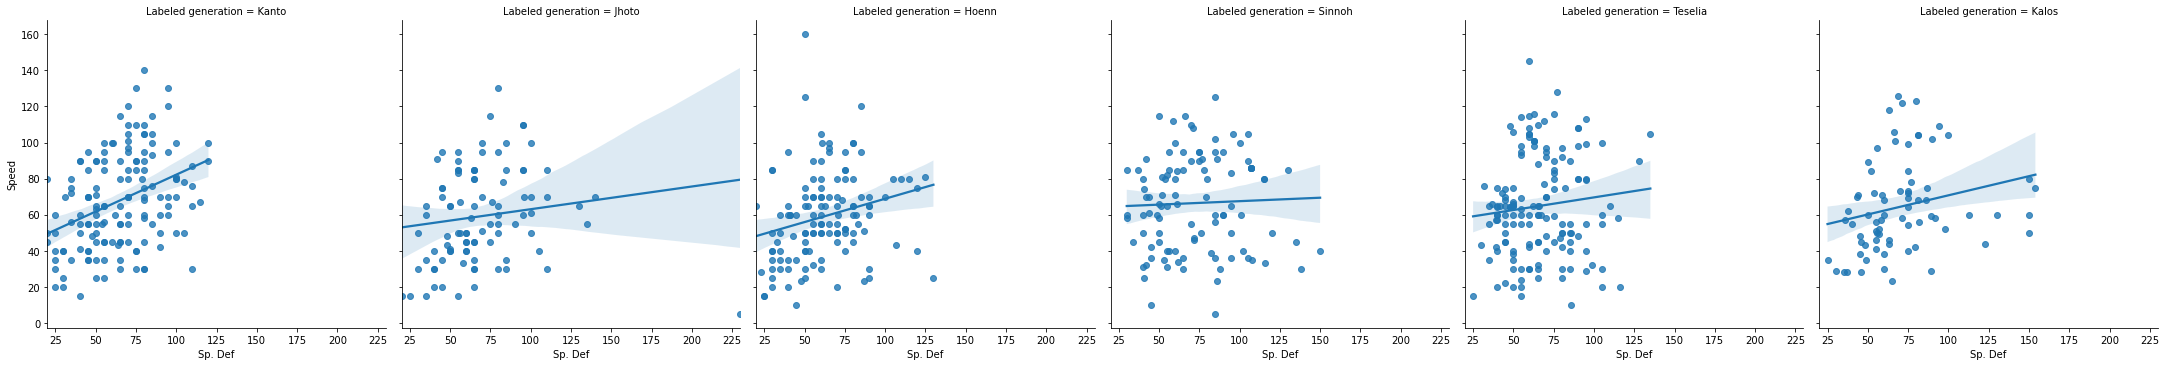

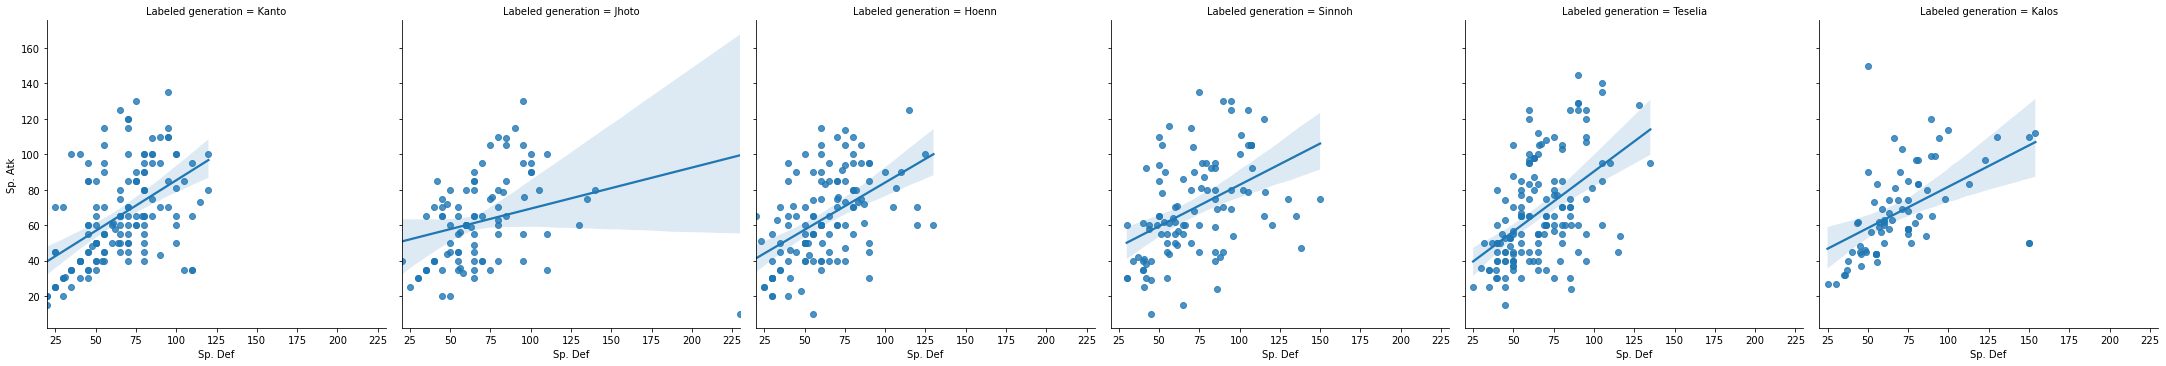

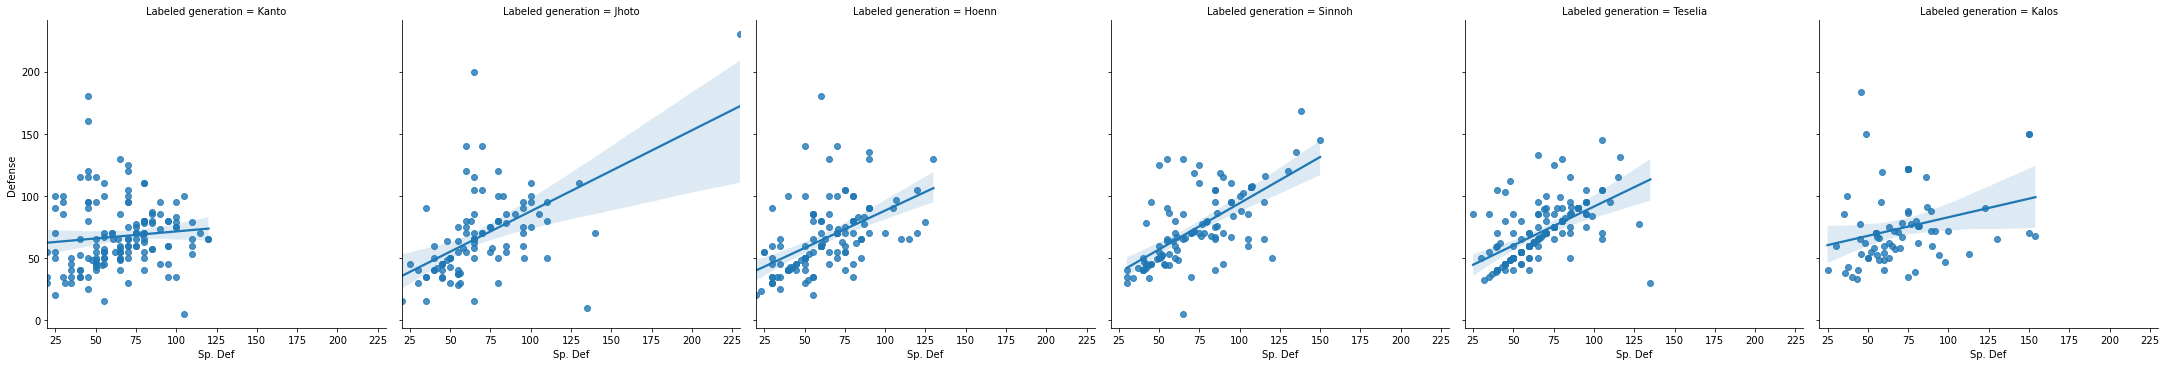

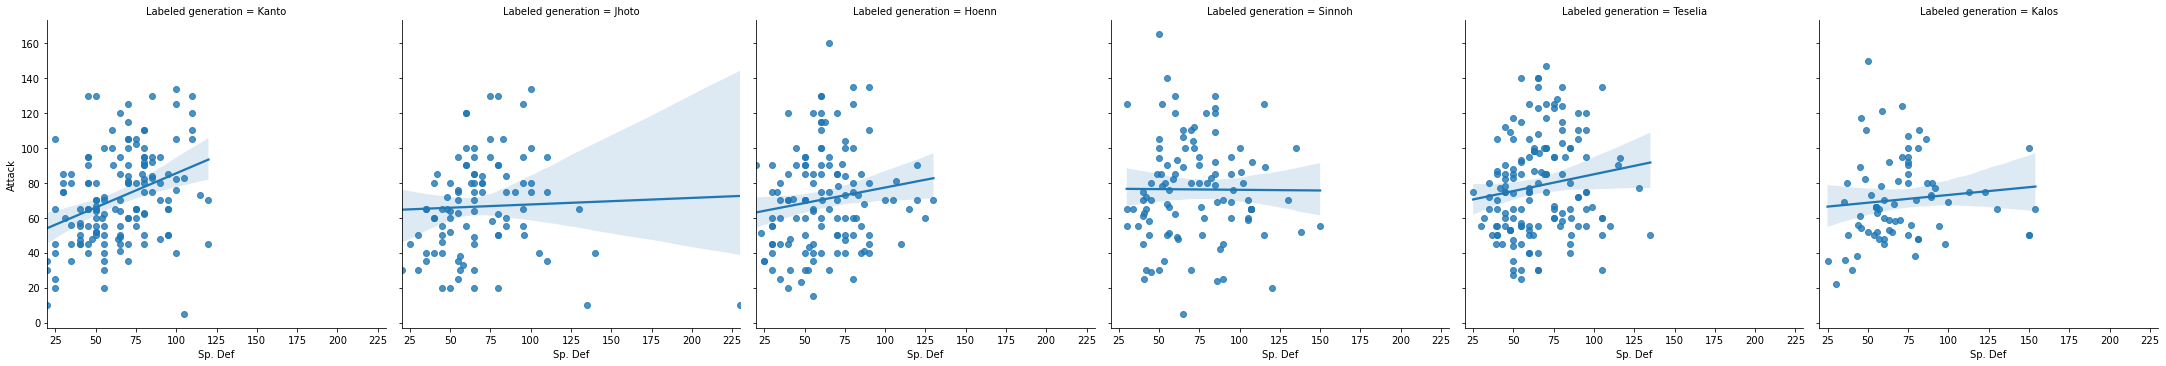

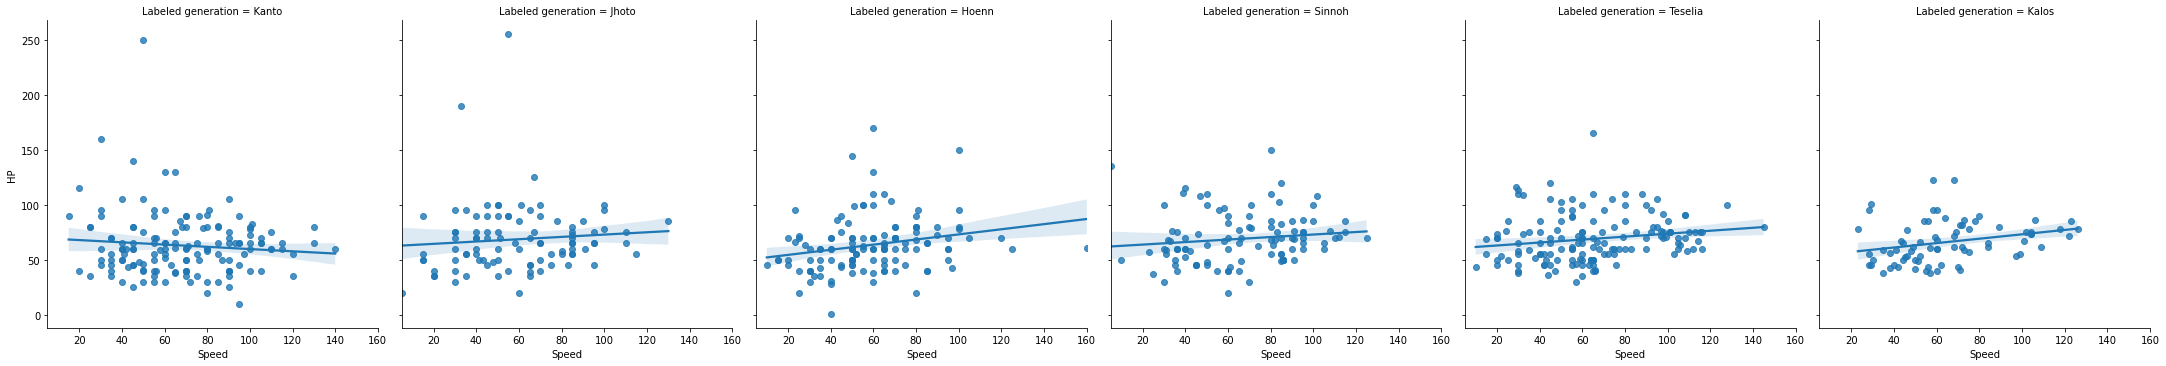

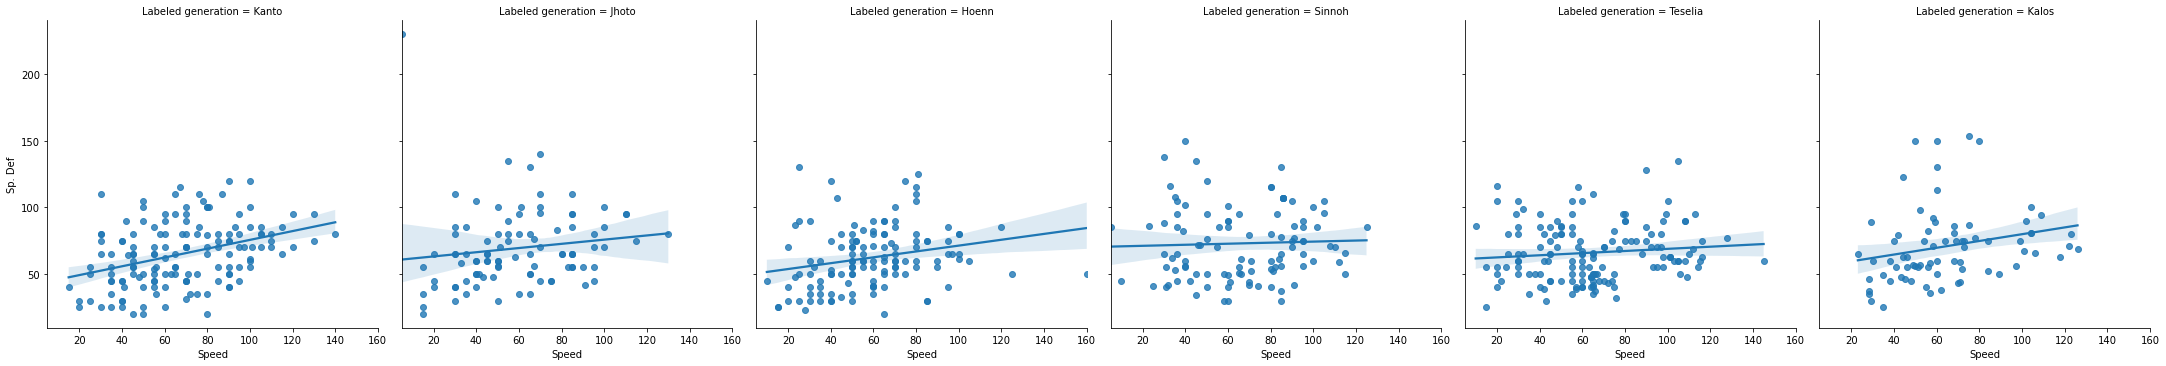

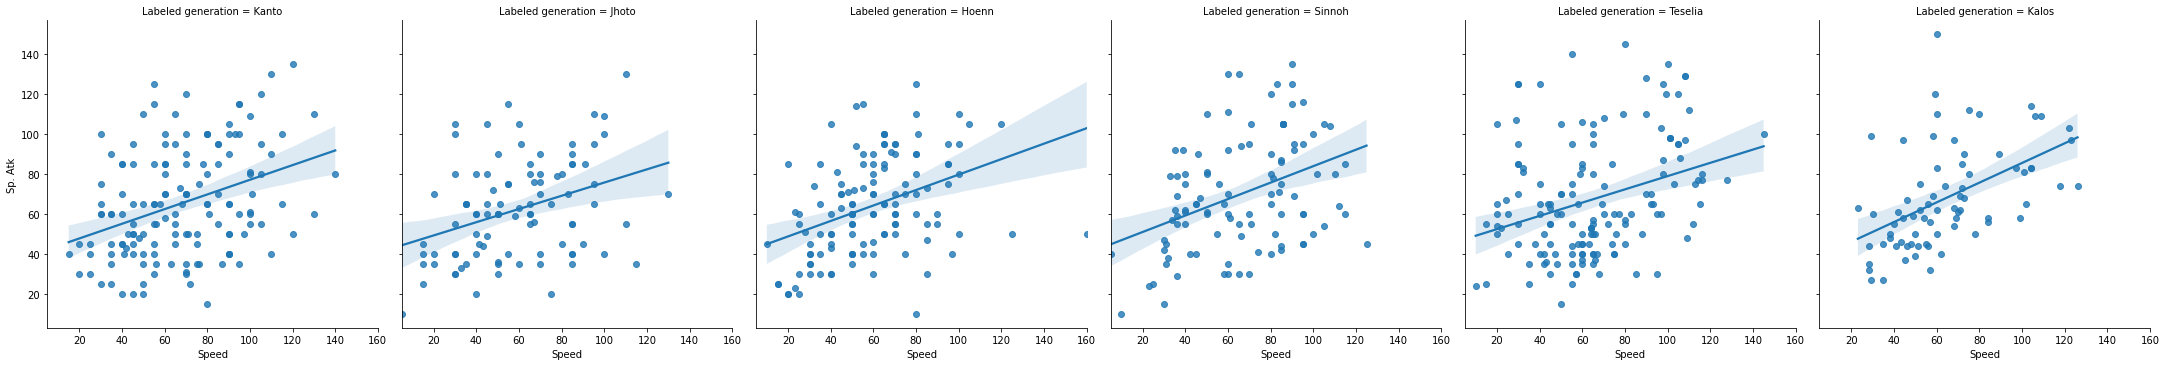

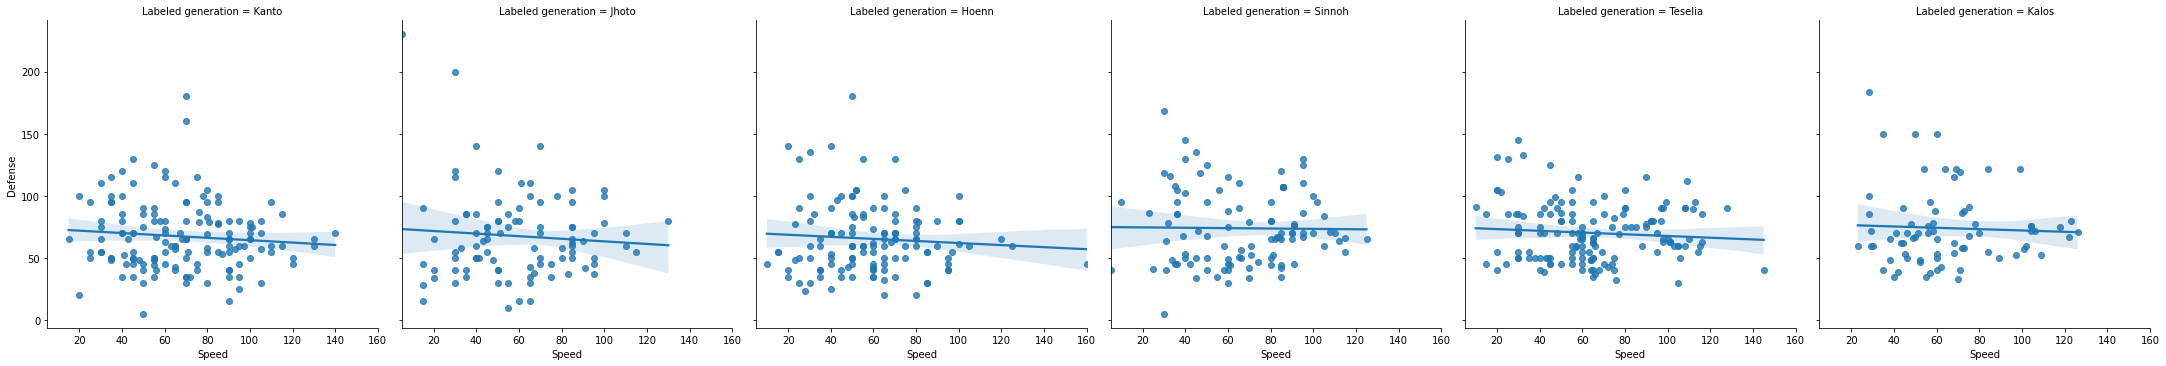

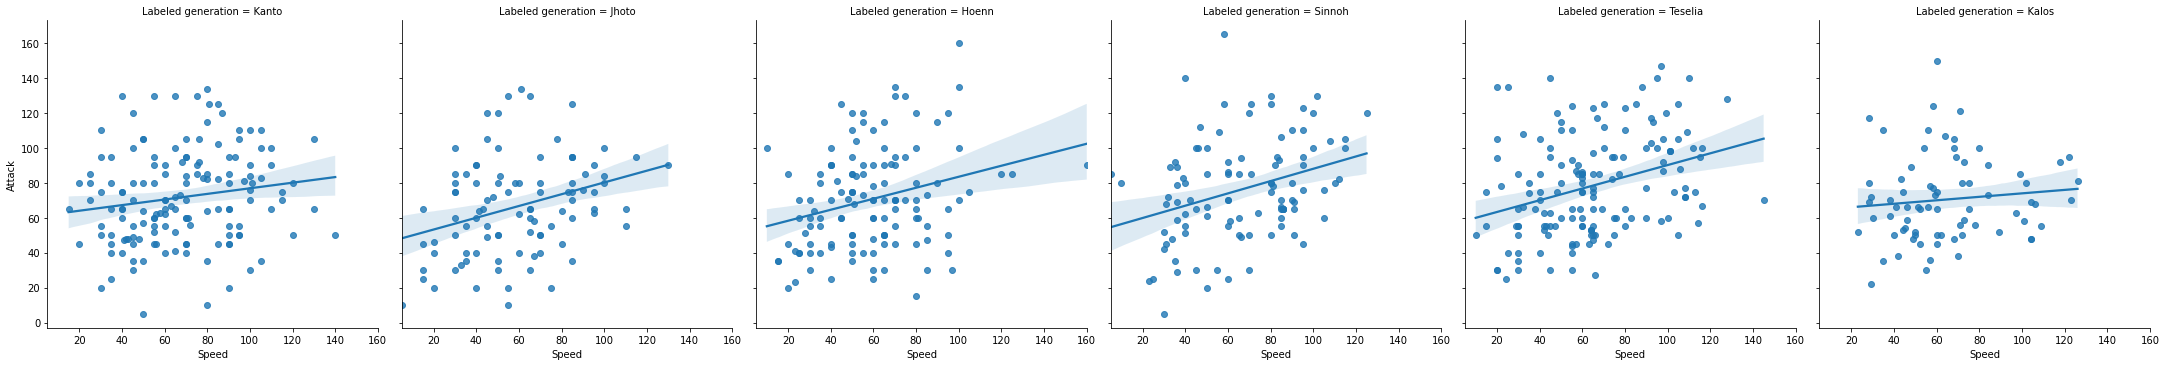

In [61]:
#Tip, we can also create all the plots for all generation with the next code. However, the problem is that we get ALL the possible plots and a lot of repetead one (Find a better way is pending)

for i in range(len(features)):
    for e in range(len(features)):
        if features[i]!=features[-e]:
            sns.lmplot(data=df_nop,x=features[i],y=features[-e],col="Labeled generation")
            plt.show()

### QUESTION 8: Is there any asociation between been legendary and first type of pokemon? (Chi square)

First we would build some contigency tables to check the general relationship between Type 1 and Legendaries.

In [62]:
percentages=pd.crosstab(df['Type 1'], df['Legendary'],normalize='index',margins=True).round(4)*100
frecuency=pd.crosstab(df['Type 1'], df['Legendary'],margins=True)
frecuency

Legendary  False  True  All
Type 1                     
Bug           69     0   69
Dark          29     2   31
Dragon        20    12   32
Electric      40     4   44
Fairy         16     1   17
Fighting      27     0   27
Fire          47     5   52
Flying         2     2    4
Ghost         30     2   32
Grass         67     3   70
Ground        28     4   32
Ice           22     2   24
Normal        96     2   98
Poison        28     0   28
Psychic       42    15   57
Rock          40     4   44
Steel         23     4   27
Water        108     4  112
All          734    66  800

In [63]:
fusion=pd.merge(frecuency,percentages,on="Type 1")
fusion.columns=["N° non lengendaries","N° of legendaries", "Total", "% Non Legendaries", "% Legendaries"]
fusion.sort_values("% Legendaries",ascending=False)

N° non lengendaries  N° of legendaries  Total  % Non Legendaries  \
Type 1                                                                       
Flying                      2                  2      4              50.00   
Dragon                     20                 12     32              62.50   
Psychic                    42                 15     57              73.68   
Steel                      23                  4     27              85.19   
Ground                     28                  4     32              87.50   
Fire                       47                  5     52              90.38   
Electric                   40                  4     44              90.91   
Rock                       40                  4     44              90.91   
Ice                        22                  2     24              91.67   
All                       734                 66    800              91.75   
Dark                       29                  2     31              93.55   
Ghost                      30                  2     32              93.75   
Fairy                      16                  1     17              94.12   
Grass                      67                  3     70              95.71   
Water                     108                  4    112              96.43   
Normal                     96                  2     98              97.96   
Poison                     28                  0     28             100.00   
Fighting                   27                  0     27             100.00   
Bug                        69                  0     69             100.00   

          % Legendaries  
Type 1                   
Flying            50.00  
Dragon            37.50  
Psychic           26.32  
Steel             14.81  
Ground            12.50  
Fire               9.62  
Electric           9.09  
Rock               9.09  
Ice                8.33  
All                8.25  
Dark               6.45  
Ghost              6.25  
Fairy              5.88  
Grass              4.29  
Water              3.57  
Normal             2.04  
Poison             0.00  
Fighting           0.00  
Bug                0.00

**Interpretation:** This table gives us an idea of which are the most common types of legendaries. We order the table based on the column % Legendaries, but we should be aware of the absolute column to correctly estimate the numbers. By doing this we can state that the most common types of legendaries are Dragon and Psychic with 37% and 26% respectively.  

#### Before using the Chisquare Test we can create a contigency table to detect the number of legendaries and non legendaries for each region

In [64]:
doblecross=pd.crosstab(df["Type 1"], [df["Legendary"], df["Labeled generation"]],rownames=["Type"], colnames=['Is legendary?', 'Region'])
doblecross=doblecross[[(False, "Kanto"), (False,  'Jhoto'),
            (False,   'Hoenn'),
            (False,   'Teselia'),
            (False,  'Sinnoh'),
            (False, 'Kalos'),
            ( True,   'Kanto'),
            ( True,   'Jhoto'),
            ( True,   'Hoenn'),
            ( True,   'Teselia'),
            ( True,  'Sinnoh'),
            ( True, 'Kalos')]]
doblecross

Is legendary? False                                  True               \
Region        Kanto Jhoto Hoenn Teselia Sinnoh Kalos Kanto Jhoto Hoenn   
Type                                                                     
Bug              14    12    12      18     10     3     0     0     0   
Dark              0     6     6      13      2     2     0     0     0   
Dragon            3     0     6       4      4     3     0     0     6   
Electric          8     6     5       6     12     3     1     1     0   
Fairy             2     5     0       0      1     8     0     0     0   
Fighting          7     2     5       7      3     3     0     0     0   
Fire             13     6     8       9      4     7     1     2     0   
Flying            0     0     0       0      0     2     0     0     0   
Ghost             4     1     5       5      5    10     0     0     0   
Grass            13     9    13      14     13     5     0     0     0   
Ground            8     3     5       8      4     0     0     0     2   
Ice               1     4     6       6      3     2     1     0     1   
Normal           24    15    18      19     16     4     0     0     0   
Poison           14     1     3       2      6     2     0     0     0   
Psychic           7     6     8      13      5     3     4     1     4   
Rock             10     5     7       5      6     7     0     0     1   
Steel             0     3    10       3      2     5     0     0     2   
Water            31    17    25      18     12     5     0     1     2   

Is legendary?                       
Region        Teselia Sinnoh Kalos  
Type                                
Bug                 0      0     0  
Dark                0      1     1  
Dragon              5      0     1  
Electric            2      0     0  
Fairy               0      0     1  
Fighting            0      0     0  
Fire                0      1     1  
Flying              2      0     0  
Ghost               0      2     0  
Grass               1      2     0  
Ground              2      0     0  
Ice                 0      0     0  
Normal              0      2     0  
Poison              0      0     0  
Psychic             1      3     2  
Rock                1      0     2  
Steel               1      1     0  
Water               0      1     0

#### Now we apply the chi square test
To do this, the contigency table should not include Totals (or as well called Margins)

In [65]:
from scipy.stats import chi2_contingency
frecuency2=pd.crosstab(df['Type 1'], df['Legendary'])
chi2, p, dof, expected = chi2_contingency(frecuency2)

In [66]:
expected

array([[ 63.3075,   5.6925],
       [ 28.4425,   2.5575],
       [ 29.36  ,   2.64  ],
       [ 40.37  ,   3.63  ],
       [ 15.5975,   1.4025],
       [ 24.7725,   2.2275],
       [ 47.71  ,   4.29  ],
       [  3.67  ,   0.33  ],
       [ 29.36  ,   2.64  ],
       [ 64.225 ,   5.775 ],
       [ 29.36  ,   2.64  ],
       [ 22.02  ,   1.98  ],
       [ 89.915 ,   8.085 ],
       [ 25.69  ,   2.31  ],
       [ 52.2975,   4.7025],
       [ 40.37  ,   3.63  ],
       [ 24.7725,   2.2275],
       [102.76  ,   9.24  ]])

In [67]:
p

1.2727066047837814e-12

**Interpretation:** As the p value is very close to 0, we can stablish that the being legendary and the type of pokemon are not independent of each other

### QUESTION 9: Can we predict if one pokemon is legendary or not based on his total? (Logistic Regression)

We can operate a logistic regression using booleans 

In [68]:
df["Legendary"]=df["Legendary"].astype(bool)

To give us an idea of which is the relationship between the dependent variable and the independent variable, we can plot it using a scatterplot. In this case we are just using one independent variable and, therefore, we just plot one image. However, if we use more variable, we should repeat the graphic as many independent variable we have.

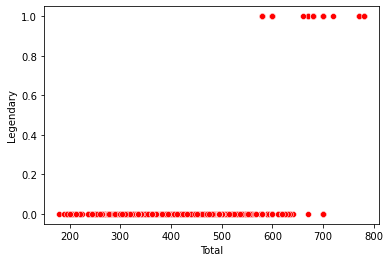

In [69]:
sns.scatterplot(x="Total", y="Legendary",data=df, color="red") 
plt.show()

**Intepretation:**: The plot gives us the idea that the Total is a good stimator to determine if one pokemon is legendary since most lengedaries have more than 600 total. 

Now we have to implement two libraries in order to formally apply the regression. The first one will help us to divide the dataset in one training and test set

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(df["Total"],df["Legendary"],test_size=0.7,random_state=42)

This step is very important and **it is not intuitive**. The X samples we just have gotten in the last step MUST be in a new shape with TWO columns. This only applies for the X samples (test and train). For the y samples, it is okay to have all the information in just one column

In [71]:
X_train = np.array(X_train).reshape((len(X_train), 1))
X_test = np.array(X_test).reshape((len(X_test), 1))

To confirm that the four samples are in a adequate shape, we can print their shapes (Notice that the X's have one more column)

In [72]:
print("The size of the test sample Y is:", y_test.shape,  "The size of the train sample Y is:", y_train.shape)
print("The size of the test sample X is:", X_test.shape, "The size of the train sample X is:", X_train.shape)

The size of the test sample Y is: (560,) The size of the train sample Y is: (240,)
The size of the test sample X is: (560, 1) The size of the train sample X is: (240, 1)


In [73]:
from sklearn.linear_model import LogisticRegression
#We create an empty object that contains the logic of the Logistic Regression (I called model, but it could be called with another name)
model=LogisticRegression()
#In this part we train our model with the samples of train
model.fit(X_train,y_train)
#Now we can use the recently trained model to predict the values in the other sample (X_test)
model.predict(X_test)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
        True, False,  True, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [89]:
model.predict_proba(X_test)

array([[6.23743276e-01, 3.76256724e-01],
       [9.81418797e-01, 1.85812026e-02],
       [9.99674626e-01, 3.25373987e-04],
       ...,
       [9.99916005e-01, 8.39954805e-05],
       [9.99846658e-01, 1.53342358e-04],
       [3.73343923e-01, 6.26656077e-01]])

In [90]:
model.score(X_test,y_test)

0.9321428571428572

**Interpretation:** The general result shows that the model correctly classify the 93% of the cases

For more detail, let build a **confusion matrix**

In [97]:
predict=model.predict(X_test)
from sklearn import metrics
cmatrix=metrics.confusion_matrix(y_test,predict)
cmatrix

array([[502,  13],
       [ 25,  20]], dtype=int64)

Lets get more fancy with the confusion matrix

In [100]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cmatrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

**Interpretation:** The confusion matrix gives us more details about the potential of the model. It shows that the model is very accurate to classify which pokemon is NOT legendary. However, has a lot of problems to classify which pokemon is Legendary. The general stimator is good because the amount of pokemon that are not legendary is much bigger than the group of legendaries. 

In [104]:
print("The general accuracy of the model is:",metrics.accuracy_score(y_test,predict))
print("The precission of the model is:", metrics.precision_score(y_test,predict))
print("The recall score is:", metrics.recall_score(y_test,predict))

The general accuracy of the model is: 0.9321428571428572
The precission of the model is: 0.6060606060606061
The recall score is: 0.4444444444444444


**Intepretation**:
- **Accuracy** refers the amount of pokemon that are correctly classify. In this case 93% of the cases
- **Precission** only works with positives (True positives and False positives). In other words, when a model makes a prediction, how often it is correct. In this case, when it says that a pokemon is legendary, it is correct in the 60% of cases. (The operation is (TP)20+(FP)13=33 -> 20/33 = 0.6)
- **Recall** only works with real positives. In other words, it says how many TRUES the model is capable to identy. In this case is not too good since it only identifies the 44% of the legendaries. (The operation is (FN) 25 + (TP) 20 = 45 -> 20/45 = 0.4)

After checking the three metrics we can say that the total gives us an excellent metric to classify non legendary pokemon. Thus, the model is relative preccisse when it makes a prediction of which pokemon is legendary. Finally, it is no a good model to identify the universe of legendary pokemon

For more details and information check this [link](https://www.iartificial.net/precision-recall-f1-accuracy-en-clasificacion/#Precision_Precision) and thi [link](https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python)